In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set plot style
sns.set(style="whitegrid")

# Paths
DATA_DIR = Path("/Users/hwangsia/Desktop/open")
SAVE_DIR = Path("reports/figures")
SAVE_DIR.mkdir(parents=True, exist_ok=True)

# Load data
train = pd.read_parquet(DATA_DIR / "train.parquet")

            count     ratio
clicked                    
0        10500000  0.980925
1          204179  0.019075


/var/folders/hg/v9v4slf113jb0w4kpzx5y_zw0000gn/T/ipykernel_25143/1074431715.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_clicked_summary.index, y=df_clicked_summary["ratio"], palette="Blues_d")


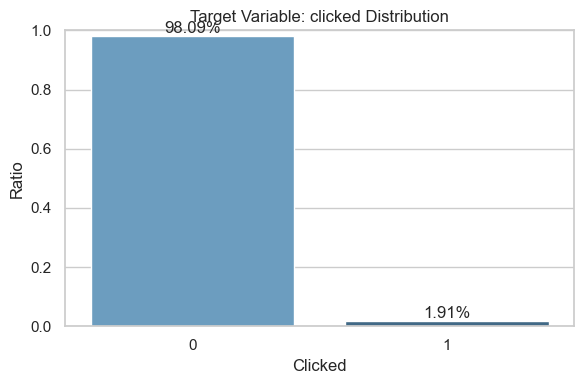

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# clicked counts & ratio 
clicked_counts = train["clicked"].value_counts()
clicked_ratio = train["clicked"].value_counts(normalize=True)

# table
df_clicked_summary = pd.DataFrame({
    "count": clicked_counts,
    "ratio": clicked_ratio
})
print(df_clicked_summary)

# visualization
plt.figure(figsize=(6, 4))
sns.barplot(x=df_clicked_summary.index, y=df_clicked_summary["ratio"], palette="Blues_d")
plt.title("Target Variable: clicked Distribution")
plt.ylabel("Ratio")
plt.xlabel("Clicked")
plt.ylim(0, 1)
for i, v in enumerate(df_clicked_summary["ratio"]):
    plt.text(i, v + 0.01, f"{v:.2%}", ha="center")
plt.tight_layout()
plt.savefig(SAVE_DIR / "target_clicked_distribution.png")
plt.show()

In [5]:
# Train / Valid set split
from sklearn.model_selection import train_test_split

train_idx, val_idx = train_test_split(
    train.index, 
    test_size=0.2, 
    stratify=train["clicked"], 
    random_state=42
)

train_df = train.loc[train_idx]
valid_df = train.loc[val_idx]

print(f"Train: {train_df.shape}, Valid: {valid_df.shape}")

Train: (8563343, 119), Valid: (2140836, 119)


In [6]:
# na counts
na_counts = train_df.isna().sum()
na_ratio = (train_df.isna().mean() * 100).round(2).astype(str) + '%'
na_df = pd.concat([na_counts, na_ratio], axis=1)
na_df.columns = ["missing_count", "missing_ratio"]
na_df = na_df[na_df["missing_count"] > 0]

na_df = na_df.sort_values(by="missing_count", ascending=False)

print(na_df)

              missing_count missing_ratio
feat_e_3             868734        10.14%
feat_a_8              14811         0.17%
feat_a_15             14811         0.17%
feat_a_17             14811         0.17%
feat_a_1              14811         0.17%
...                     ...           ...
feat_c_1              13696         0.16%
feat_d_6              13696         0.16%
feat_d_5              13696         0.16%
feat_d_4              13696         0.16%
history_b_30          13696         0.16%

[96 rows x 2 columns]



--- gender ---
Unique values: 2
gender
1.0     5371506
2.0     3178141
None      13696
Name: count, dtype: int64


/var/folders/hg/v9v4slf113jb0w4kpzx5y_zw0000gn/T/ipykernel_25143/300714596.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ctr.index.astype(str), y=ctr.values, palette="viridis")


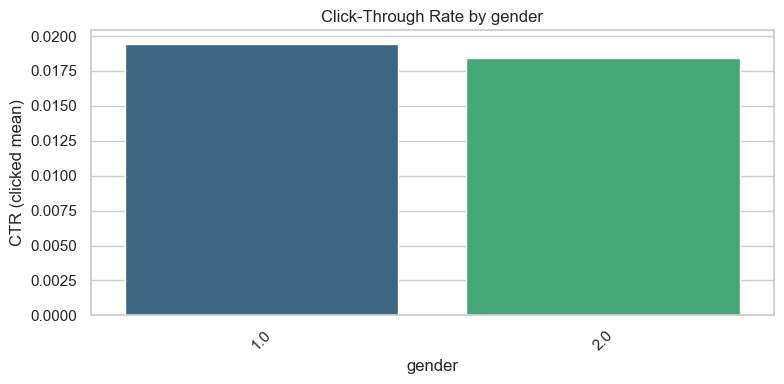


--- age_group ---
Unique values: 8
age_group
7.0     2964887
8.0     2117184
6.0     1857422
5.0      472959
4.0      443085
3.0      383279
2.0      287558
1.0       23273
None      13696
Name: count, dtype: int64


/var/folders/hg/v9v4slf113jb0w4kpzx5y_zw0000gn/T/ipykernel_25143/300714596.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ctr.index.astype(str), y=ctr.values, palette="viridis")


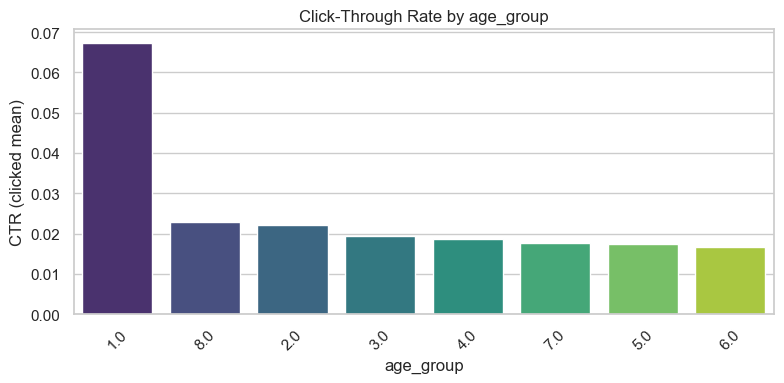


--- inventory_id ---
Unique values: 18
inventory_id
2     2104626
36    1214474
37    1117062
29     813132
42     811137
46     657807
88     535733
43     363043
31     347004
11     257222
Name: count, dtype: int64


/var/folders/hg/v9v4slf113jb0w4kpzx5y_zw0000gn/T/ipykernel_25143/300714596.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ctr.index.astype(str), y=ctr.values, palette="viridis")


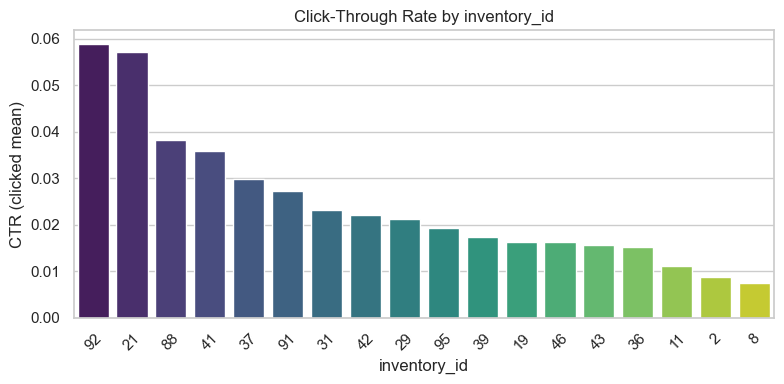


--- day_of_week ---
Unique values: 7
day_of_week
2    1224903
6    1224614
5    1224357
3    1224015
4    1223993
7    1221200
1    1220261
Name: count, dtype: int64


/var/folders/hg/v9v4slf113jb0w4kpzx5y_zw0000gn/T/ipykernel_25143/300714596.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ctr.index.astype(str), y=ctr.values, palette="viridis")


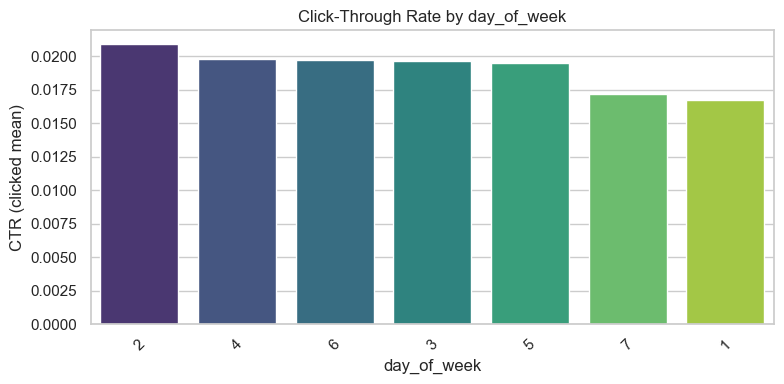


--- hour ---
Unique values: 24
hour
08    603843
12    486376
07    482454
09    469680
20    467888
10    461276
19    455981
21    432936
00    428886
11    410429
Name: count, dtype: int64


/var/folders/hg/v9v4slf113jb0w4kpzx5y_zw0000gn/T/ipykernel_25143/300714596.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ctr.index.astype(str), y=ctr.values, palette="viridis")


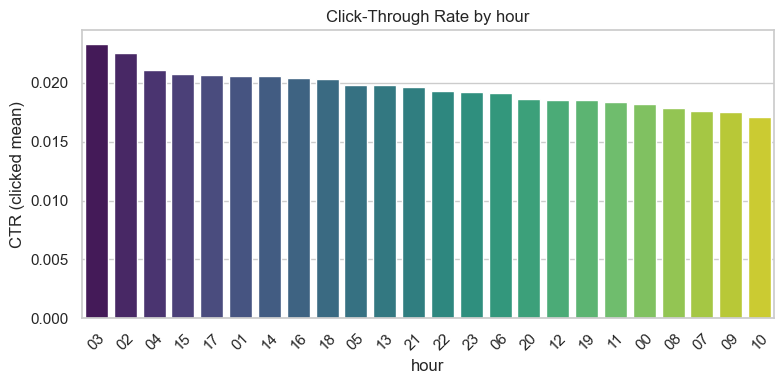

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# categorical variables
cat_cols = ["gender", "age_group", "inventory_id", "day_of_week", "hour"]

for col in cat_cols:
    print(f"\n--- {col} ---")
    print("Unique values:", train_df[col].nunique())
    print(train_df[col].value_counts(dropna=False).head(10))

    # ctr calculation
    ctr = train_df.groupby(col)["clicked"].mean().sort_values(ascending=False)

    # Plot
    plt.figure(figsize=(8, 4))
    sns.barplot(x=ctr.index.astype(str), y=ctr.values, palette="viridis")
    plt.title(f"Click-Through Rate by {col}")
    plt.ylabel("CTR (clicked mean)")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(SAVE_DIR / f"eda_ctr_by_{col}.png")
    plt.show()

In [8]:
def convert_to_category(df, cols):
    """
    transform to category dtype 
    """
    out = df.copy()
    for c in cols:
        if c in out.columns:
            out[c] = out[c].astype("Float64").round().astype("Int64").astype("category")
    return out


train_df=convert_to_category(train_df, cat_cols)
valid_df = convert_to_category(valid_df,cat_cols)

In [9]:
l_feat_discrete = [
    'l_feat_1', 'l_feat_2', 'l_feat_3','l_feat_4', 'l_feat_8', 'l_feat_13',
    'l_feat_16', 'l_feat_18', 'l_feat_19', 'l_feat_20', 'l_feat_21',
    'l_feat_22', 'l_feat_23', 'l_feat_24', 'l_feat_26', 'l_feat_27'
]

train_df=convert_to_category(train_df, l_feat_discrete)
valid_df = convert_to_category(valid_df,l_feat_discrete)


In [10]:
l_feat_continuous = [c for c in train.columns if c.startswith('l_feat_') and c not in l_feat_discrete]
print(l_feat_continuous)

['l_feat_5', 'l_feat_6', 'l_feat_7', 'l_feat_9', 'l_feat_10', 'l_feat_11', 'l_feat_12', 'l_feat_14', 'l_feat_15', 'l_feat_17', 'l_feat_25']


/var/folders/hg/v9v4slf113jb0w4kpzx5y_zw0000gn/T/ipykernel_25143/3546753899.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ctr = train_df.groupby(c)['clicked'].mean()


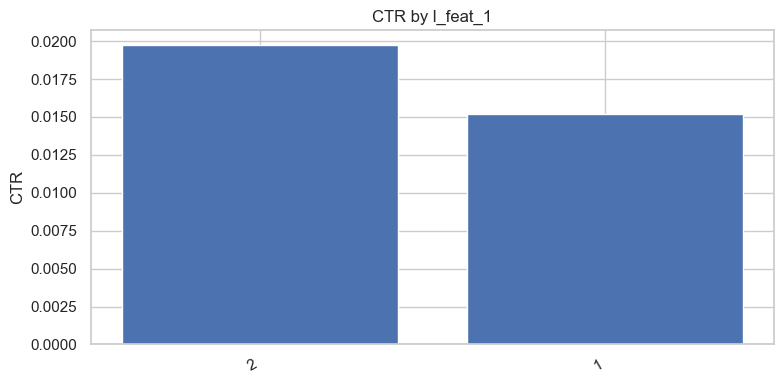

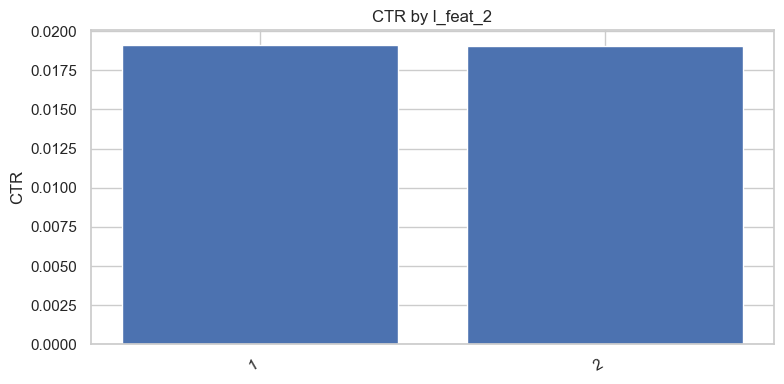

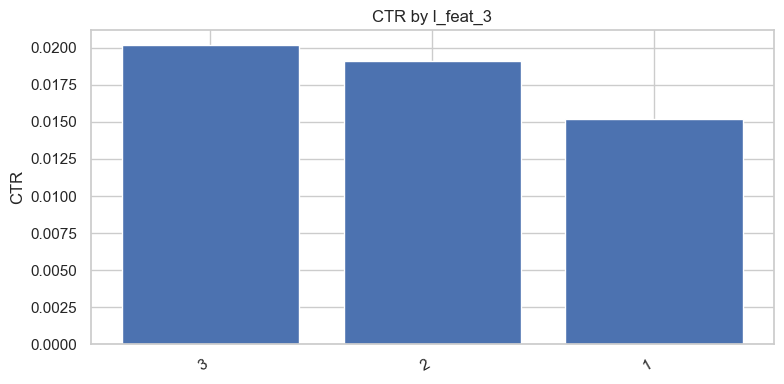

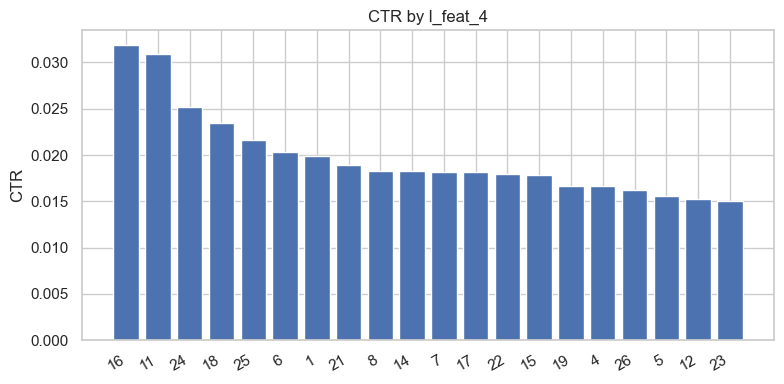

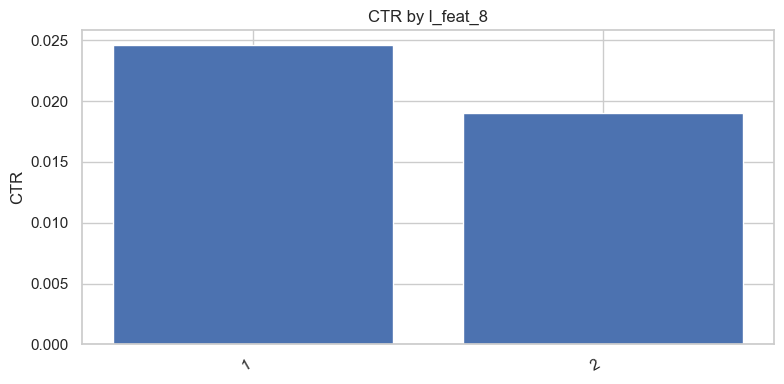

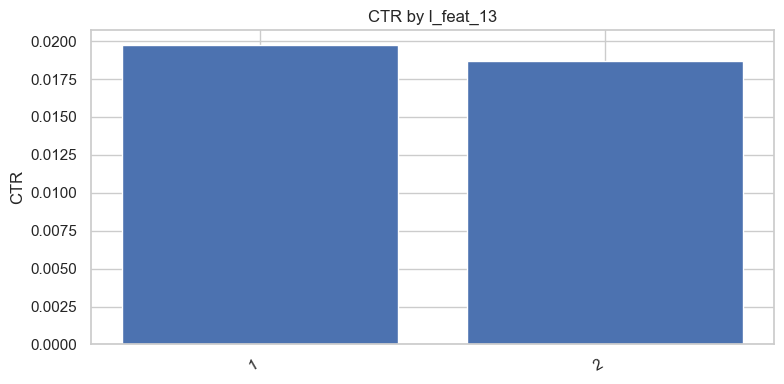

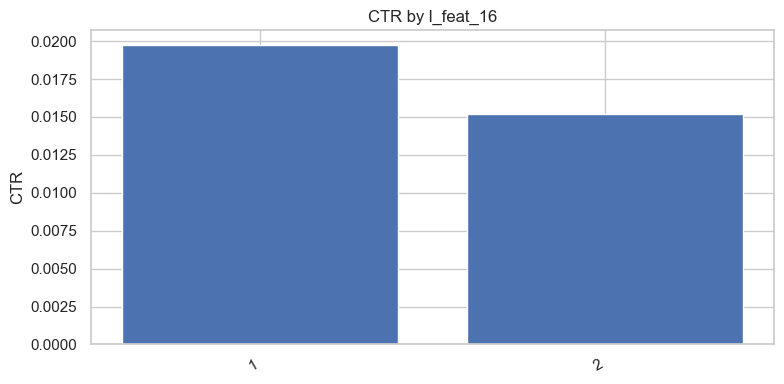

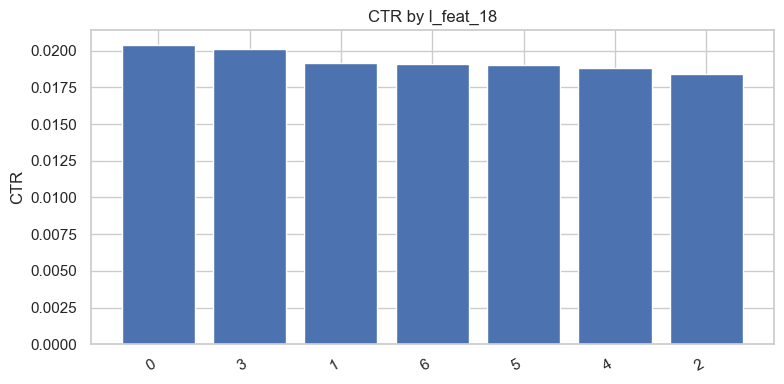

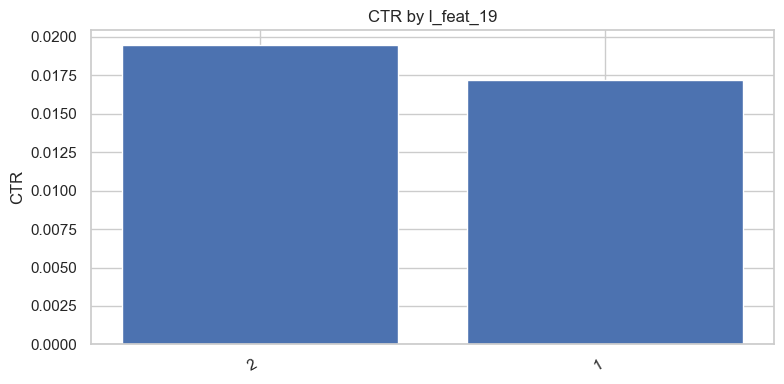

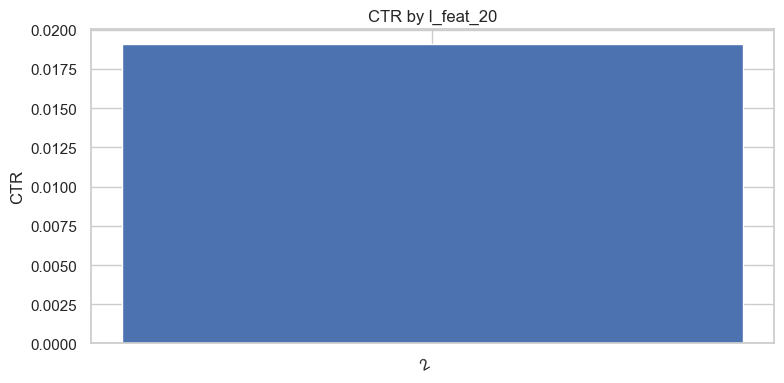

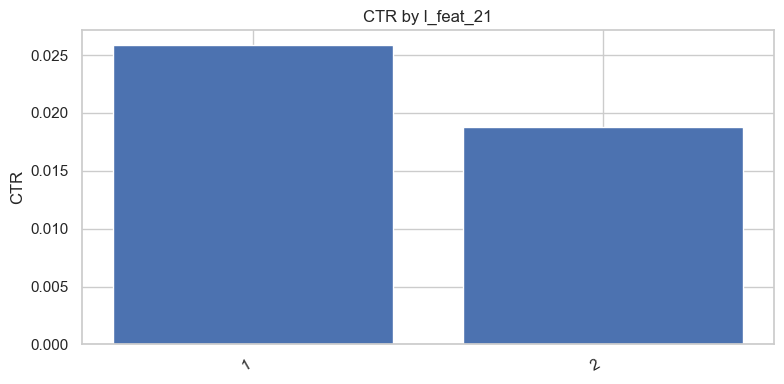

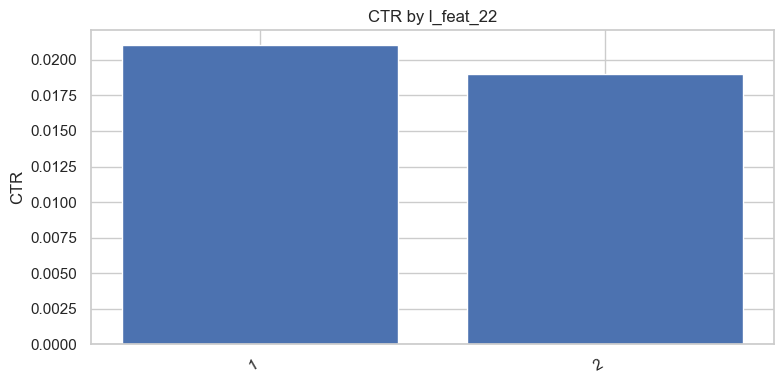

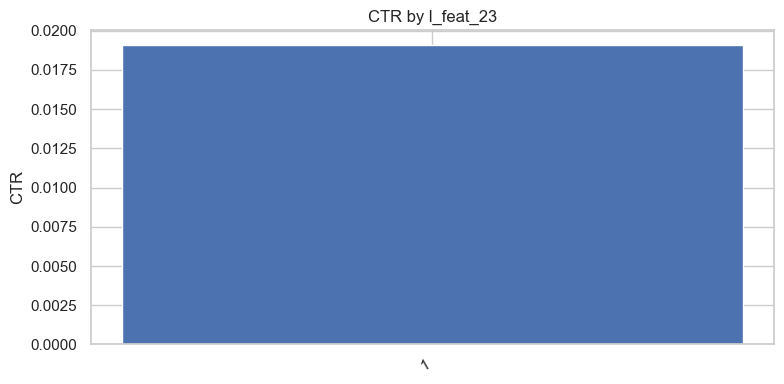

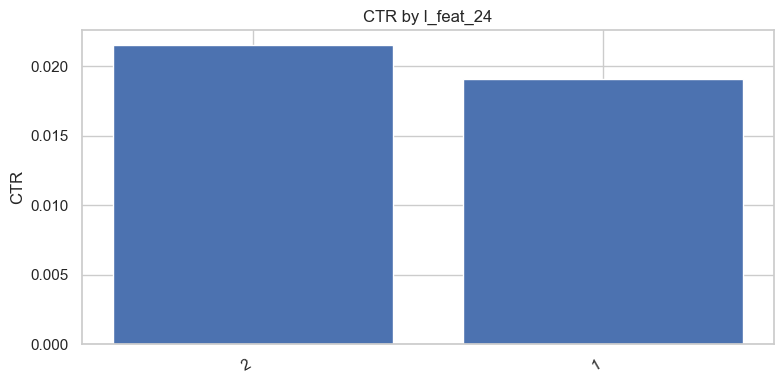

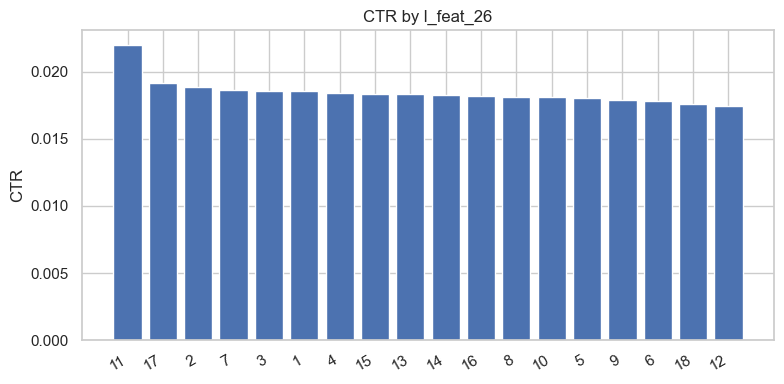

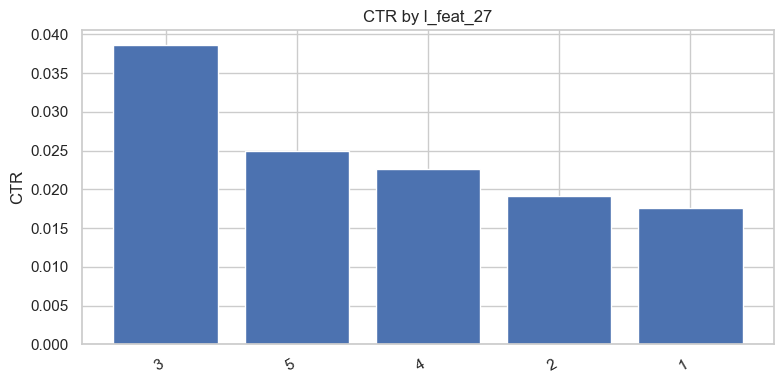

In [11]:
# l_feat_discrete variables 
# CTR tables
ctr_maps = {}
for c in l_feat_discrete:
    ctr = train_df.groupby(c)['clicked'].mean()
    ctr_maps[c] = ctr

# Plot CTR by each discrete l_feat_* feature (Top K only)
import matplotlib.pyplot as plt

K = 20  
for c in l_feat_discrete:
    s = ctr_maps[c].sort_values(ascending=False)
    if len(s) > K:
        s = s.head(K)
    
    plt.figure(figsize=(8, 4))
    plt.bar(s.index.astype(str), s.values)
    plt.title(f"CTR by {c}")
    plt.ylabel("CTR")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()  

In [12]:
# l_feat_continuous 
# NA percentage
print(train_df[l_feat_continuous].isnull().mean().sort_values(ascending=False))

# summary table
train_df[l_feat_continuous].describe().T

l_feat_5     0.0
l_feat_6     0.0
l_feat_7     0.0
l_feat_9     0.0
l_feat_10    0.0
l_feat_11    0.0
l_feat_12    0.0
l_feat_14    0.0
l_feat_15    0.0
l_feat_17    0.0
l_feat_25    0.0
dtype: float64


,count,mean,std,min,25%,50%,75%,max
l_feat_5,8563343.0,393.831573,289.999451,1.0,105.0,376.0,652.0,1079.0
l_feat_6,8563343.0,314.871948,231.341766,1.0,109.0,279.0,471.0,903.0
l_feat_7,8563343.0,147.892914,71.928543,1.0,94.0,146.0,212.0,313.0
l_feat_9,8563343.0,212.799393,125.099663,1.0,101.0,224.0,309.0,476.0
l_feat_10,8563343.0,123.927483,62.091522,1.0,83.0,125.0,179.0,262.0
l_feat_11,8563343.0,623.430664,392.182800,1.0,288.0,594.0,949.0,1527.0
l_feat_12,8563343.0,2348.103027,1541.098267,1.0,878.0,2247.0,3916.0,5061.0
l_feat_14,8563343.0,1906.478271,978.644592,1.0,1055.0,2114.0,2924.0,3245.0
l_feat_15,8563343.0,1298.203369,787.244324,1.0,613.0,1190.0,2303.0,2590.0
l_feat_17,8563343.0,212.799393,125.099663,1.0,101.0,224.0,309.0,476.0


In [13]:
# 1. Check correlation between l_feat_9 and l_feat_17
corr_value = train_df[['l_feat_9', 'l_feat_17']].corr().iloc[0, 1]
print(f"Correlation between l_feat_9 and l_feat_17: {corr_value:.4f}")


Correlation between l_feat_9 and l_feat_17: 1.0000


In [14]:
train_df.drop(columns=['l_feat_17'], inplace=True)

# 2. Drop l_feat_25 due to lack of information
# Almost all values are identical (1129), providing minimal variance → drop
train_df.drop(columns=['l_feat_25'], inplace=True)
print("Dropped l_feat_25 due to nearly constant values.")

Dropped l_feat_25 due to nearly constant values.


In [15]:
# Drop trivial columns from valid_df
valid_df.drop(columns=['l_feat_17', 'l_feat_25'], errors='ignore', inplace=True)

In [16]:
# change l_feat_continous dtype to integer
int_cols = ['l_feat_5', 'l_feat_6', 'l_feat_7', 'l_feat_9', 'l_feat_10',
            'l_feat_11', 'l_feat_12', 'l_feat_14', 'l_feat_15']
train_df[int_cols] = train_df[int_cols].astype('int')
valid_df[int_cols] = valid_df[int_cols].astype('int')

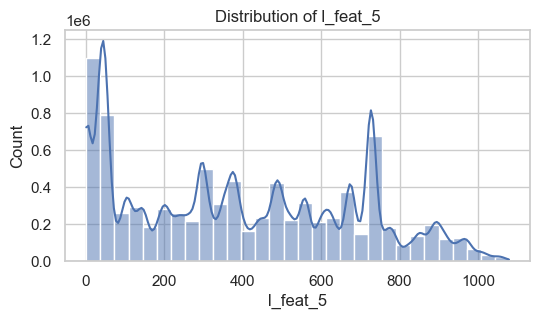

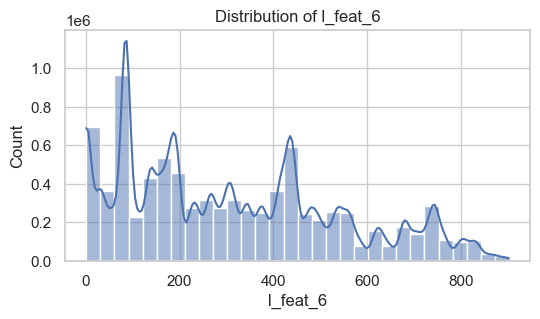

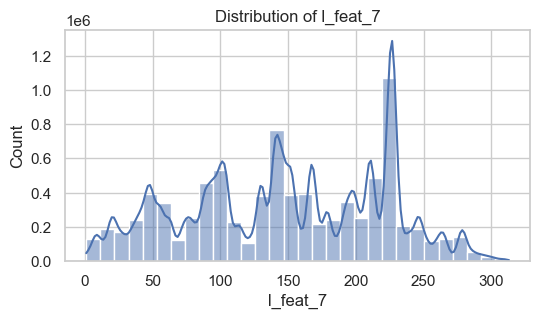

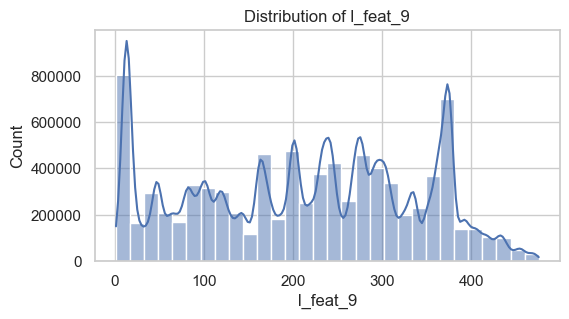

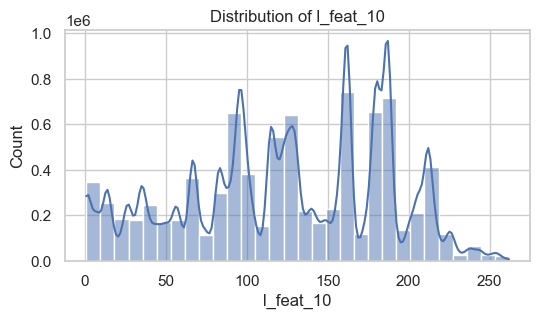

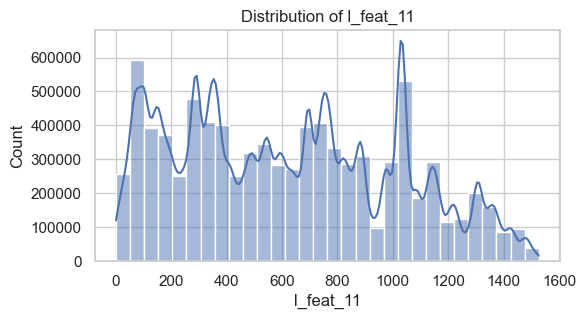

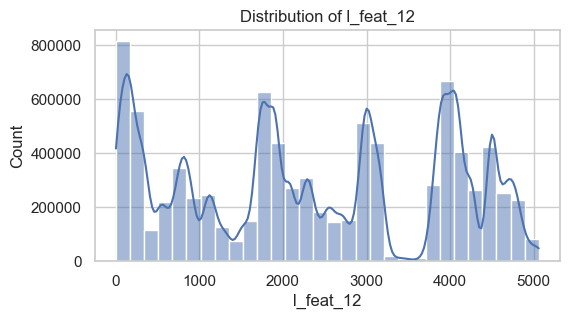

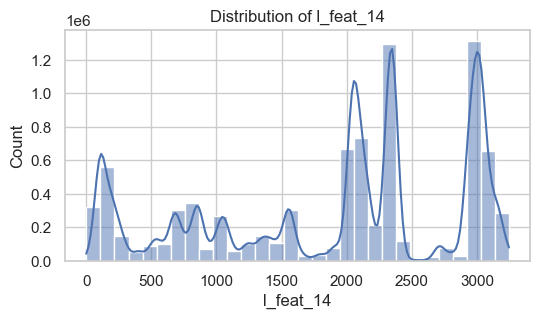

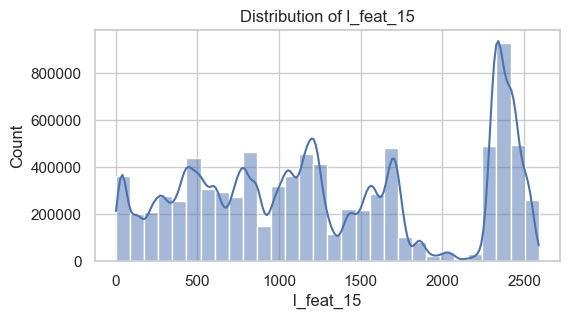

In [17]:
# Histogram 
import seaborn as sns
import matplotlib.pyplot as plt

for col in int_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(data=train_df, x=col, bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

Features with correlation > 0.8:



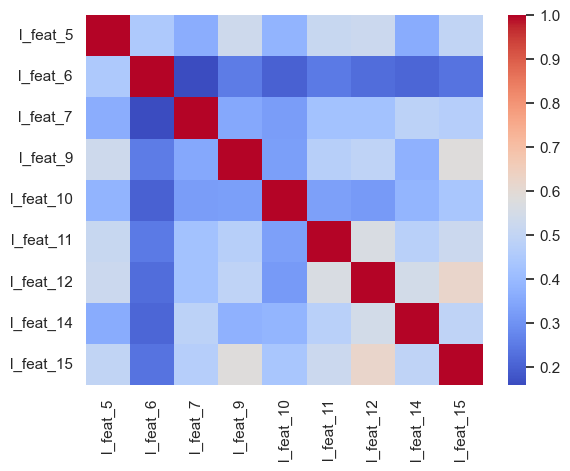

In [19]:
# X vs. X correlationship 
sns.heatmap(train_df[int_cols].corr(), annot=False, cmap='coolwarm')

import numpy as np
corr_matrix = train_df[int_cols].corr().abs()
np.fill_diagonal(corr_matrix.values, 0) # exclude diag.

threshold = 0.8
high_corr_pairs = np.where(corr_matrix > threshold)
printed = set()

print(f"Features with correlation > {threshold}:\n")
for i, j in zip(*high_corr_pairs):
    pair = tuple(sorted((corr_matrix.index[i], corr_matrix.columns[j])))
    if pair not in printed:
        printed.add(pair)
        print(f"{pair[0]} ↔ {pair[1]}: {corr_matrix.iloc[i, j]:.3f}")

In [21]:
# feat_e_* features
feat_e_cols = [c for c in train.columns if c.startswith('feat_e_')]
feat_e_cols.sort()
print(feat_e_cols)

['feat_e_1', 'feat_e_10', 'feat_e_2', 'feat_e_3', 'feat_e_4', 'feat_e_5', 'feat_e_6', 'feat_e_7', 'feat_e_8', 'feat_e_9']


In [22]:
# feat_e_* summary table
train_df[feat_e_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
feat_e_1,8549647.0,61.125225,9.929082,0.361111,63.555557,65.000000,65.000000,65.000000
feat_e_10,8549647.0,-303.853973,209.873932,-2391.942871,-434.457153,-268.785706,-133.414291,0.014286
feat_e_2,8549647.0,-2570.793701,2290.272217,-311604.250000,-3852.426025,-2287.833252,-851.666687,18073.945312
feat_e_3,7694609.0,9.880831,11.143710,1.136364,3.409091,5.454545,10.227273,170.454544
feat_e_4,8549647.0,-0.049464,0.005345,-0.100000,-0.050000,-0.050000,-0.050000,0.000000
feat_e_5,8549647.0,-0.055604,0.110109,-2.431373,-0.098039,-0.019608,0.019608,0.019608
feat_e_6,8549647.0,-0.064738,0.075751,-1.701299,-0.090909,-0.038961,-0.012987,0.012987
feat_e_7,8549647.0,46.402946,70.329140,-0.062500,3.250000,21.375000,59.312500,1277.375000
feat_e_8,8549647.0,-186.463333,120.833900,-783.755554,-263.622223,-172.155548,-89.577774,0.022222
feat_e_9,8549647.0,-18.979820,26.880898,-587.677429,-25.043011,-10.193548,-2.344086,0.010753


Missing value ratio (%):
feat_e_3     10.14%
feat_e_1      0.16%
feat_e_2      0.16%
feat_e_4      0.16%
feat_e_5      0.16%
feat_e_6      0.16%
feat_e_7      0.16%
feat_e_8      0.16%
feat_e_9      0.16%
feat_e_10     0.16%
dtype: object


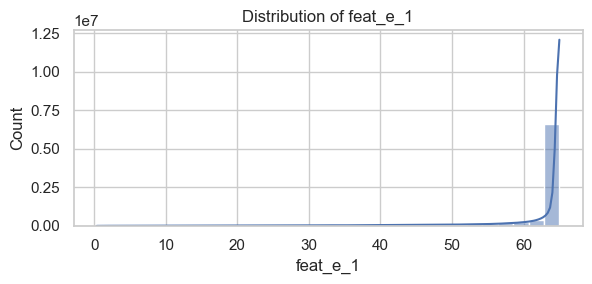

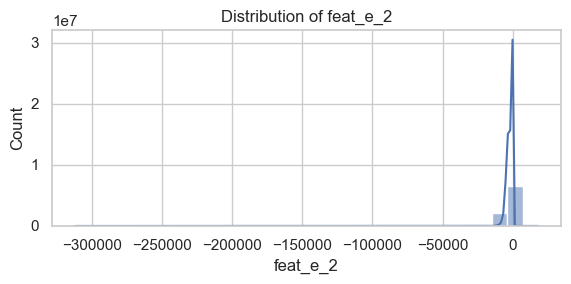

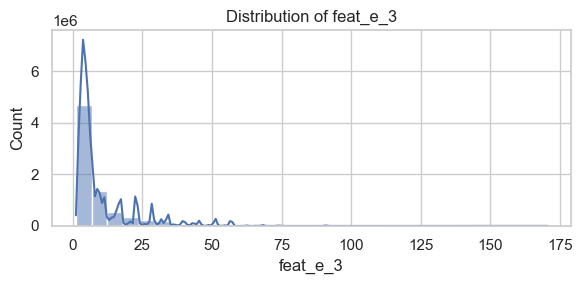

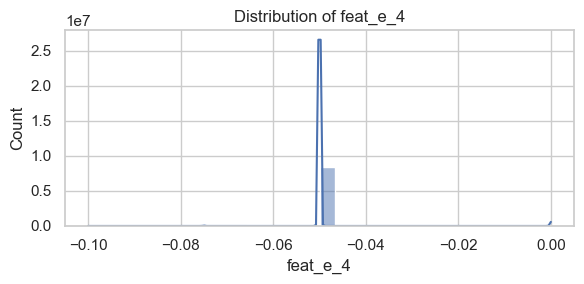

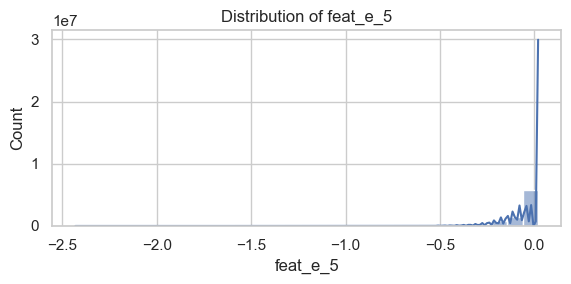

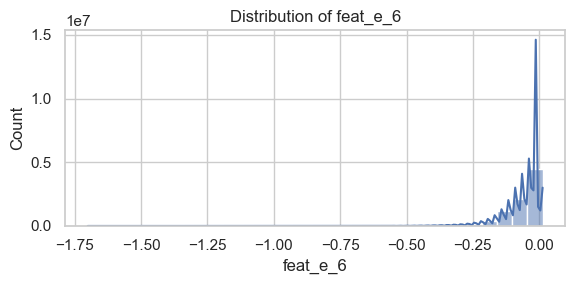

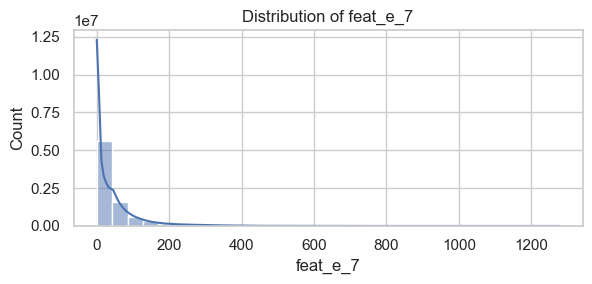

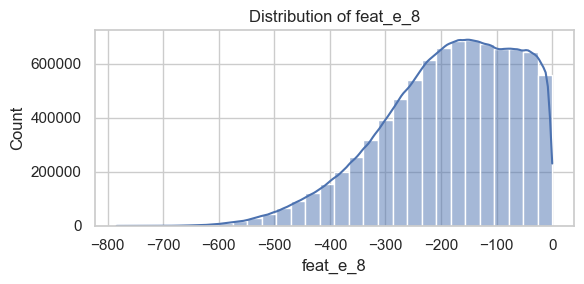

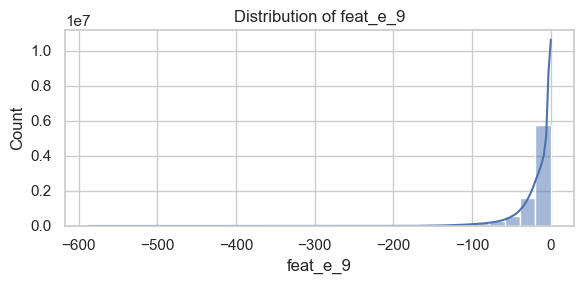

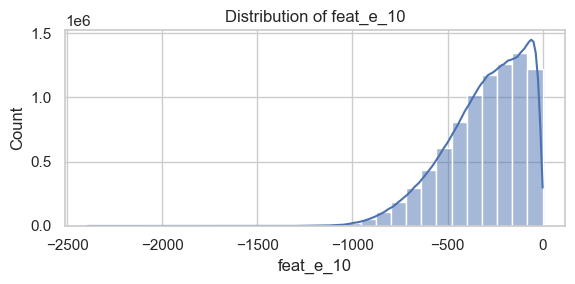

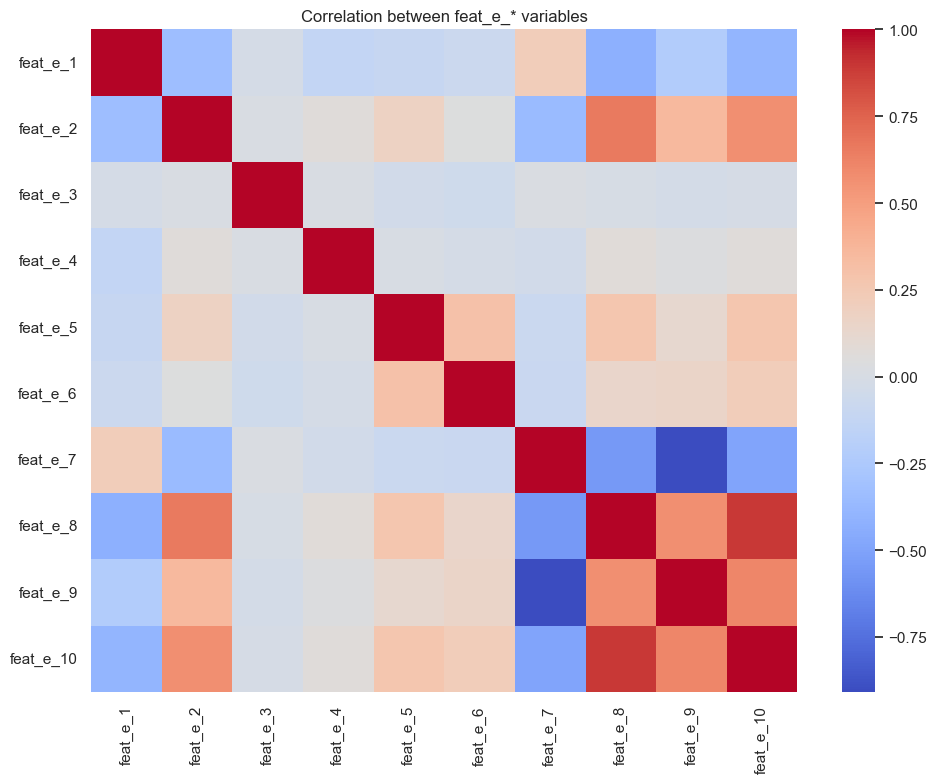


Feature pairs with correlation > 0.8:

feat_e_7 ↔ feat_e_9: 0.908
feat_e_10 ↔ feat_e_8: 0.890


In [23]:
# %%
# 1. Missing value ratio for feat_e_* variables
feat_e_cols = [col for col in train_df.columns if col.startswith("feat_e_")]
na_ratio_e = train_df[feat_e_cols].isnull().mean().sort_values(ascending=False)
print("Missing value ratio (%):")
print((na_ratio_e * 100).round(2).astype(str) + "%")

# %%
# 2. Histogram for feat_e_* features
import matplotlib.pyplot as plt
import seaborn as sns

for col in feat_e_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(data=train_df, x=col, bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

# %%
# 3. Correlation matrix (feat_e_* variables only)
import numpy as np

plt.figure(figsize=(10, 8))
sns.heatmap(train_df[feat_e_cols].corr(), cmap='coolwarm', annot=False)
plt.title("Correlation between feat_e_* variables")
plt.tight_layout()
plt.show()

# Print feature pairs with correlation above threshold
corr_matrix_e = train_df[feat_e_cols].corr().abs()
np.fill_diagonal(corr_matrix_e.values, 0)  # exclude diagonal

threshold = 0.8
high_corr_e = np.where(corr_matrix_e > threshold)
printed_e = set()

print(f"\nFeature pairs with correlation > {threshold}:\n")
for i, j in zip(*high_corr_e):
    pair = tuple(sorted((corr_matrix_e.index[i], corr_matrix_e.columns[j])))
    if pair not in printed_e:
        printed_e.add(pair)
        print(f"{pair[0]} ↔ {pair[1]}: {corr_matrix_e.iloc[i, j]:.3f}")

In [24]:
# %%
# Step 1: Identify feat_d_* columns
feat_d_cols = [c for c in train.columns if c.startswith("feat_d_")]
print(f"feat_d_* columns: {feat_d_cols}")

# %%
# Step 2: Summary table for feat_d_* features (train_df 기준)
train_df[feat_d_cols].describe().T

feat_d_* columns: ['feat_d_1', 'feat_d_2', 'feat_d_3', 'feat_d_4', 'feat_d_5', 'feat_d_6']


,count,mean,std,min,25%,50%,75%,max
feat_d_1,8549647.0,0.362487,0.067685,0.000000,0.376623,0.389610,0.389610,0.389610
feat_d_2,8549647.0,1.616537,0.651351,0.000000,1.600000,1.933333,2.000000,2.000000
feat_d_3,8549647.0,1.475151,0.563570,0.000000,1.588235,1.764706,1.764706,1.764706
feat_d_4,8549647.0,9.274422,9.778038,0.000000,2.108108,6.000000,13.785633,78.000000
feat_d_5,8549647.0,-0.218758,0.116756,-0.303030,-0.303030,-0.292929,-0.111111,0.000000
feat_d_6,8549647.0,-0.297417,0.168547,-0.422535,-0.422535,-0.408451,-0.140845,0.000000


Missing value ratio for feat_d_* features:
feat_d_1    0.16%
feat_d_2    0.16%
feat_d_3    0.16%
feat_d_4    0.16%
feat_d_5    0.16%
feat_d_6    0.16%
dtype: object


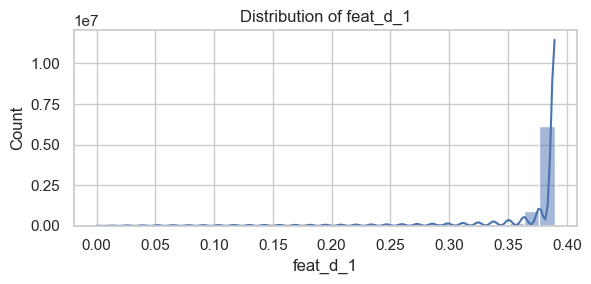

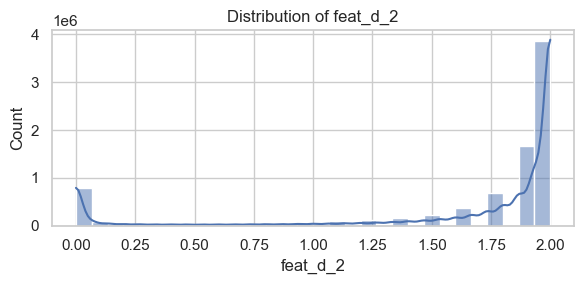

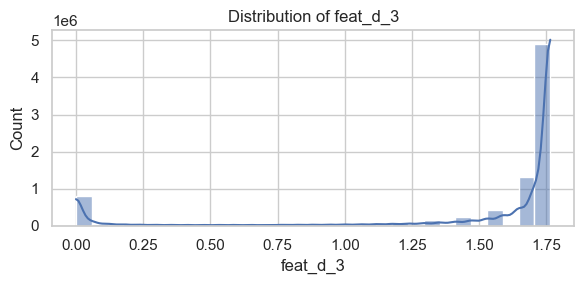

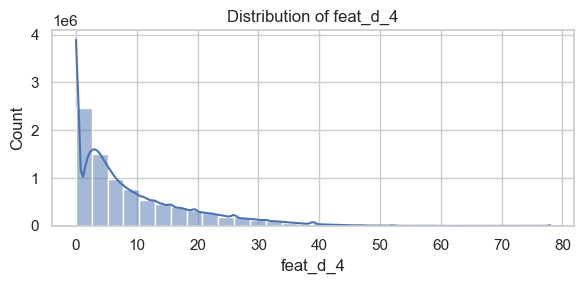

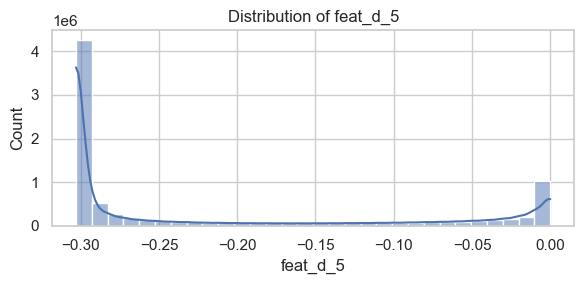

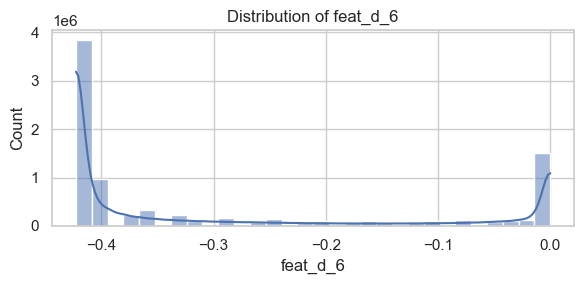

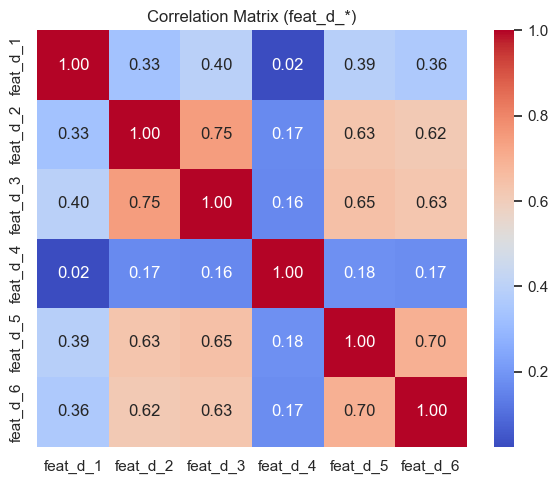


Feature pairs with correlation > 0.8:



In [26]:

# 1. Missing value ratio
na_ratio_d = train_df[feat_d_cols].isnull().mean().sort_values(ascending=False)
print("Missing value ratio for feat_d_* features:")
print((na_ratio_d * 100).round(2).astype(str) + '%')

# %%
# 2. Histogram plots for distribution of feat_d_* features
import matplotlib.pyplot as plt
import seaborn as sns

for col in feat_d_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(data=train_df, x=col, bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

# %%
# 3. Feature-to-feature correlation (feat_d_*)
import numpy as np

corr_matrix_d = train_df[feat_d_cols].corr().abs()
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix_d, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (feat_d_*)")
plt.tight_layout()
plt.show()

# Also print pairs with high correlation > 0.8
np.fill_diagonal(corr_matrix_d.values, 0)  # Exclude self-correlation
threshold = 0.8
high_corr_pairs = np.where(corr_matrix_d > threshold)
printed = set()

print(f"\nFeature pairs with correlation > {threshold}:\n")
for i, j in zip(*high_corr_pairs):
    pair = tuple(sorted((corr_matrix_d.index[i], corr_matrix_d.columns[j])))
    if pair not in printed:
        printed.add(pair)
        print(f"{pair[0]} ↔ {pair[1]}: {corr_matrix_d.iloc[i, j]:.3f}")

In [27]:
# # %%
# Step 1: Identify feat_c_* columns
feat_c_cols = [c for c in train.columns if c.startswith("feat_c_")]
print(f"feat_c_* columns: {feat_c_cols}")

# %%
# Step 2: Summary table for feat_c_* features (train_df 기준)
train_df[feat_c_cols].describe().T

feat_c_* columns: ['feat_c_1', 'feat_c_2', 'feat_c_3', 'feat_c_4', 'feat_c_5', 'feat_c_6', 'feat_c_7', 'feat_c_8']


,count,mean,std,min,25%,50%,75%,max
feat_c_1,8549647.0,53.781235,12.940802,0.0,56.784985,58.635109,58.778076,58.849396
feat_c_2,8549647.0,9.177243,14.671859,0.0,0.081588,0.480112,10.546433,35.999992
feat_c_3,8549647.0,52.869156,24.399979,0.0,31.975409,59.106060,75.238960,83.000000
feat_c_4,8549647.0,25.627361,6.007428,0.0,26.119205,28.134329,28.625807,29.000000
feat_c_5,8549647.0,35.209797,12.758033,0.0,28.447369,41.173553,44.647549,47.000000
feat_c_6,8549647.0,6.394335,2.174810,0.0,5.957447,7.437186,7.801460,8.000000
feat_c_7,8549647.0,68.593964,16.507799,0.0,73.776207,73.954559,73.959229,74.000000
feat_c_8,8549647.0,23.155140,8.413702,0.0,17.422222,26.412699,30.181053,32.000000


In [28]:
# %%
# Step 3: Check missing value ratio for feat_c_* features
na_ratio_c = train_df[feat_c_cols].isnull().mean().sort_values(ascending=False)
na_ratio_c = (na_ratio_c * 100).round(2).astype(str) + '%'
print("Missing value ratio per feat_c_* feature:\n")
print(na_ratio_c)


Missing value ratio per feat_c_* feature:

feat_c_1    0.16%
feat_c_2    0.16%
feat_c_3    0.16%
feat_c_4    0.16%
feat_c_5    0.16%
feat_c_6    0.16%
feat_c_7    0.16%
feat_c_8    0.16%
dtype: object


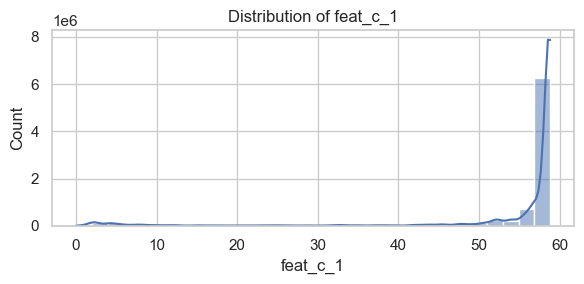

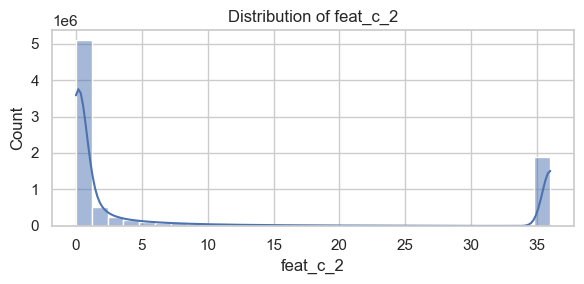

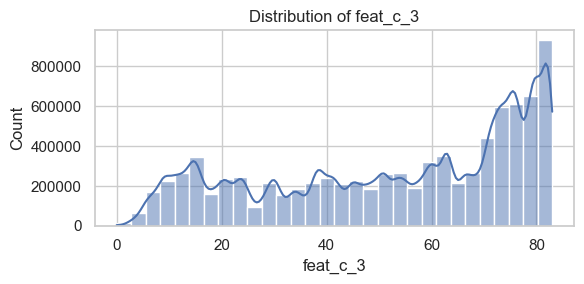

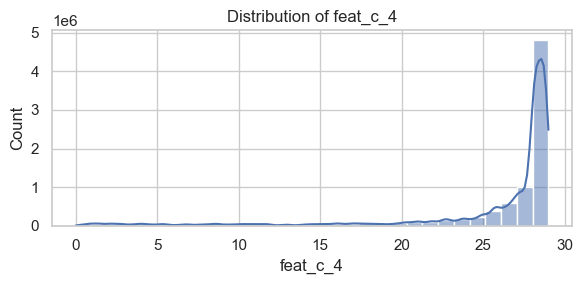

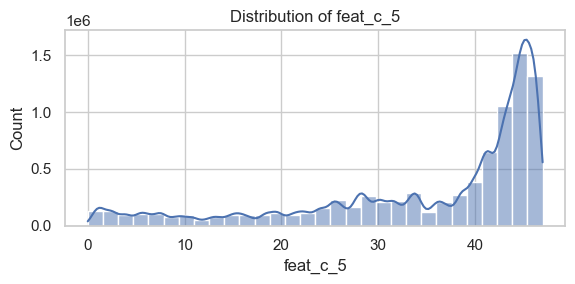

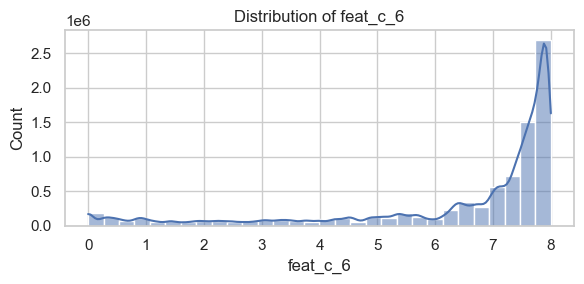

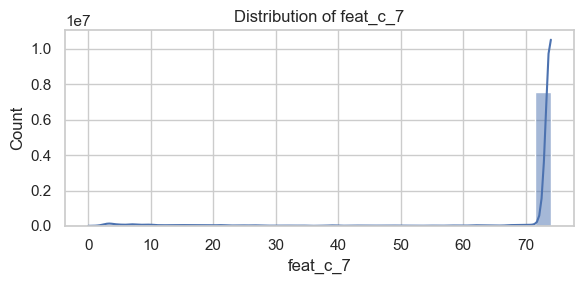

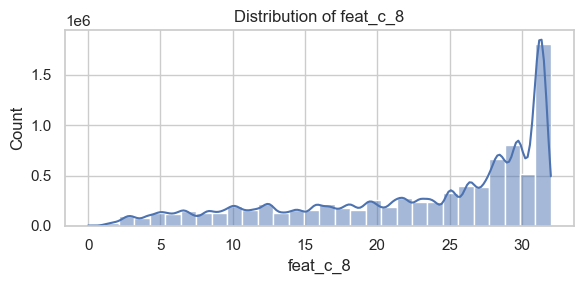

In [30]:
# %%
# Step 4: Histogram for each feat_c_* feature
import matplotlib.pyplot as plt
import seaborn as sns

for col in feat_c_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(train_df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

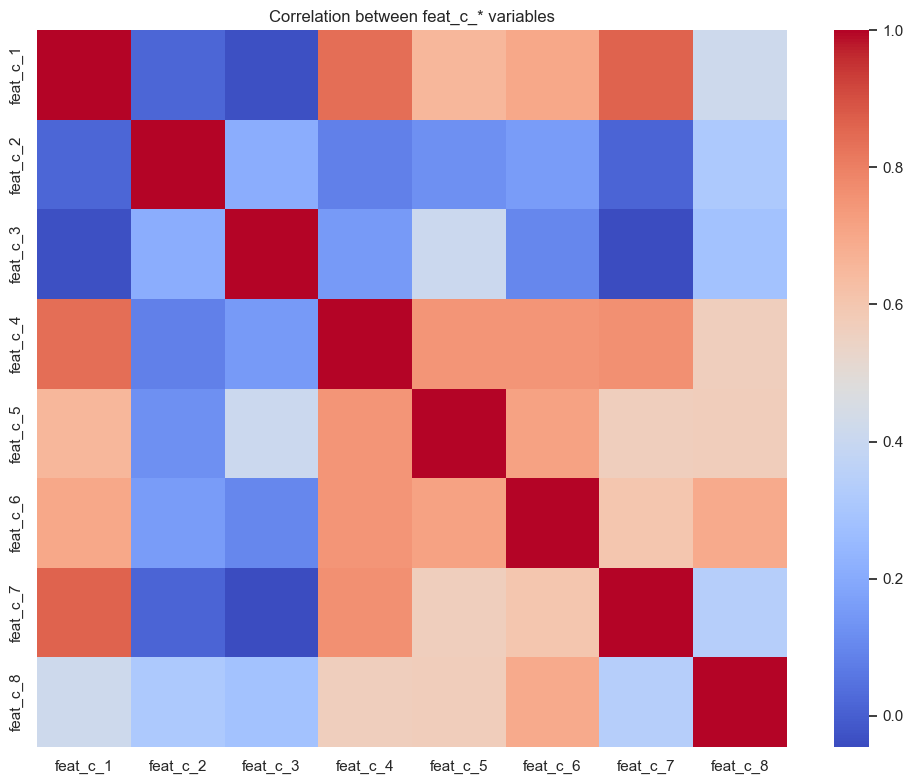

Feature pairs with correlation > 0.8:

feat_c_1 ↔ feat_c_4: 0.840
feat_c_1 ↔ feat_c_7: 0.865


In [31]:
# %%
# Step 5: Correlation matrix for feat_c_* features
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(train_df[feat_c_cols].corr(), annot=False, cmap='coolwarm')
plt.title("Correlation between feat_c_* variables")
plt.tight_layout()
plt.show()

# Identify highly correlated pairs
corr_matrix = train_df[feat_c_cols].corr().abs()
np.fill_diagonal(corr_matrix.values, 0)  # Ignore self-correlation

threshold = 0.8
high_corr_pairs = np.where(corr_matrix > threshold)
printed = set()

print(f"Feature pairs with correlation > {threshold}:\n")
for i, j in zip(*high_corr_pairs):
    pair = tuple(sorted((corr_matrix.index[i], corr_matrix.columns[j])))
    if pair not in printed:
        printed.add(pair)
        print(f"{pair[0]} ↔ {pair[1]}: {corr_matrix.iloc[i, j]:.3f}")

In [32]:
# %%
# Step 1: Identify feat_b_* columns
feat_b_cols = [c for c in train.columns if c.startswith("feat_b_")]
print(f"feat_b_* columns: {feat_b_cols}")

feat_b_* columns: ['feat_b_1', 'feat_b_2', 'feat_b_3', 'feat_b_4', 'feat_b_5', 'feat_b_6']


In [33]:
# %%
# Step 2: Summary table for feat_b_* features
train_df[feat_b_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
feat_b_1,8549647.0,4.600941,26.507782,0.000000,3.752577,4.340206,4.618556,2066.103027
feat_b_2,8549647.0,-2.914865,2.866530,-278.433746,-4.337349,-3.373494,-0.216867,0.000000
feat_b_3,8549647.0,24.008724,25.338665,0.000000,6.037037,17.833334,35.537037,1172.740723
feat_b_4,8549647.0,0.770251,0.294549,0.000000,0.804124,0.907216,0.927835,1.319588
feat_b_5,8549647.0,-45.834209,35.168213,-979.368408,-70.631577,-41.561405,-15.631579,0.000000
feat_b_6,8549647.0,1373.559570,1457.979126,0.000000,419.833344,1170.916626,2069.583252,86991.835938


In [34]:
# %%
# Step 3: NA percentage for feat_b_* features
na_ratio = train_df[feat_b_cols].isnull().mean().sort_values(ascending=False)
print(na_ratio)

feat_b_1    0.001599
feat_b_2    0.001599
feat_b_3    0.001599
feat_b_4    0.001599
feat_b_5    0.001599
feat_b_6    0.001599
dtype: float64


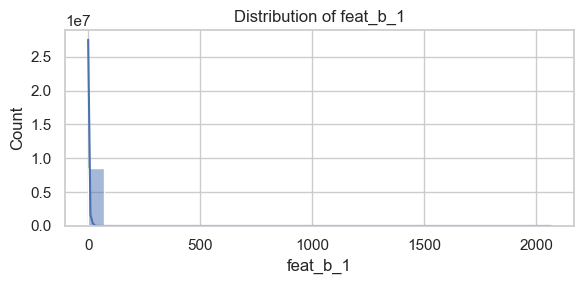

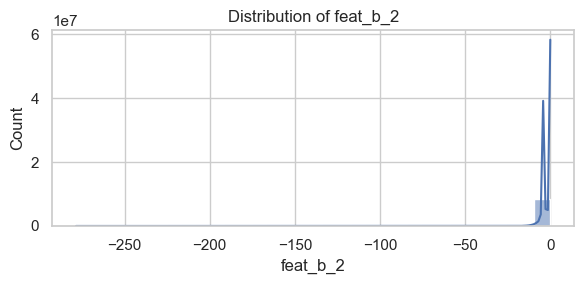

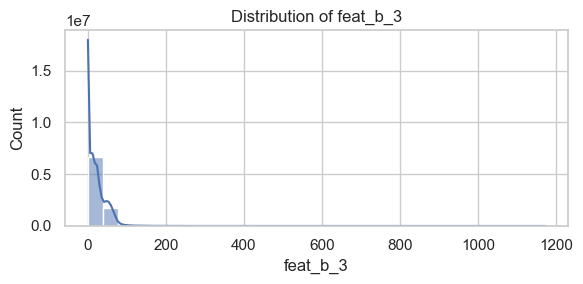

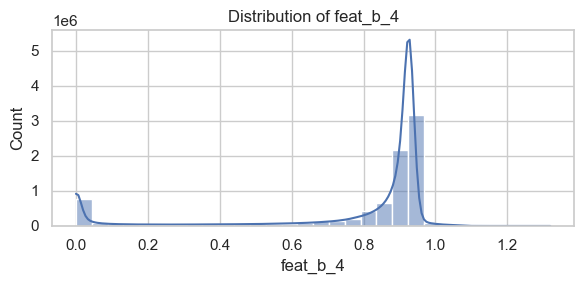

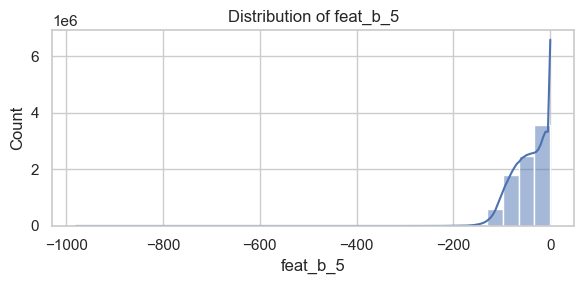

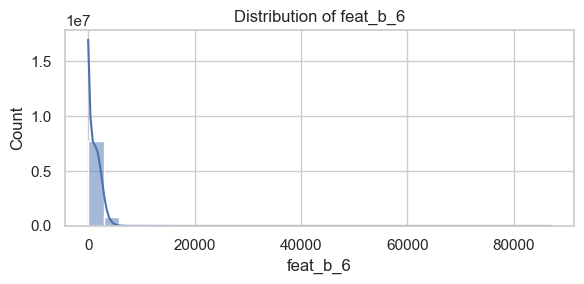

In [35]:
# %%
# Step 4: Histogram for feat_b_* features
import matplotlib.pyplot as plt
import seaborn as sns

for col in feat_b_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(data=train_df, x=col, bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

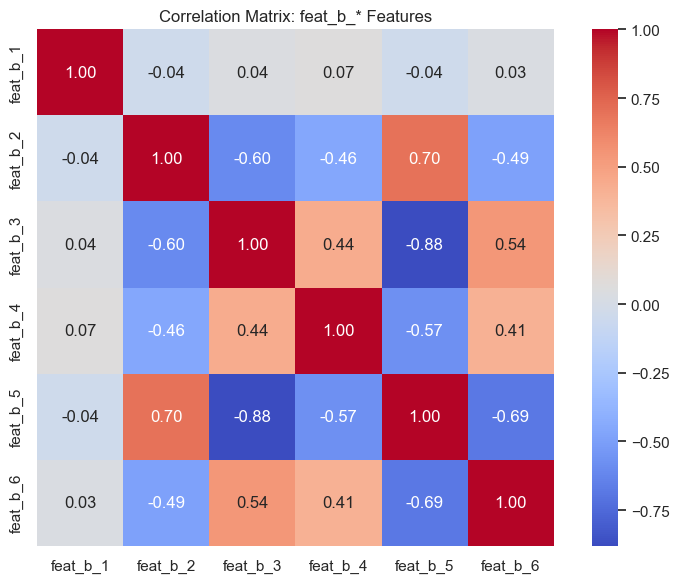

Feature pairs with correlation > 0.8:

feat_b_3 ↔ feat_b_5: 0.880


In [36]:
# %%
# Step 5: Correlation heatmap for feat_b_* features
import numpy as np

plt.figure(figsize=(8, 6))
corr_matrix = train_df[feat_b_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix: feat_b_* Features")
plt.tight_layout()
plt.show()

# %%
# Step 6: Print highly correlated feature pairs (threshold > 0.8)
corr_abs = corr_matrix.abs()
np.fill_diagonal(corr_abs.values, 0)

threshold = 0.8
high_corr_pairs = np.where(corr_abs > threshold)
printed = set()

print(f"Feature pairs with correlation > {threshold}:\n")
for i, j in zip(*high_corr_pairs):
    pair = tuple(sorted((corr_abs.index[i], corr_abs.columns[j])))
    if pair not in printed:
        printed.add(pair)
        print(f"{pair[0]} ↔ {pair[1]}: {corr_abs.iloc[i, j]:.3f}")

In [37]:
# feat_a_*
# %%
# Step 1: Identify feat_a_* columns
feat_a_cols = [c for c in train_df.columns if c.startswith("feat_a_")]
print(f"feat_a_* columns: {feat_a_cols}")

feat_a_* columns: ['feat_a_1', 'feat_a_2', 'feat_a_3', 'feat_a_4', 'feat_a_5', 'feat_a_6', 'feat_a_7', 'feat_a_8', 'feat_a_9', 'feat_a_10', 'feat_a_11', 'feat_a_12', 'feat_a_13', 'feat_a_14', 'feat_a_15', 'feat_a_16', 'feat_a_17', 'feat_a_18']


In [38]:
# %%
# Step 2: Summary table for feat_a_* features (based on train_df)
train_df[feat_a_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
feat_a_1,8548532.0,1.678859,4.539003,0.0,0.0000,0.0000,0.000000,14.400000
feat_a_2,8548532.0,0.002429,0.101742,0.0,0.0000,0.0000,0.000000,4.800000
feat_a_3,8548532.0,3.885809,10.021938,0.0,0.0000,0.0000,0.000000,30.600000
feat_a_4,8548532.0,6.199773,21.677511,0.0,0.0000,0.0000,0.000000,88.199997
feat_a_5,8548532.0,27.347338,35.730949,0.0,0.0000,0.0000,68.416801,86.808601
feat_a_6,8548532.0,4.874423,6.527388,0.0,0.0000,0.0000,11.400000,17.100000
feat_a_7,8548532.0,6.751160,12.662527,0.0,0.0000,0.0000,0.000000,36.900002
feat_a_8,8548532.0,1.867167,9.758915,0.0,0.0000,0.0000,0.000000,63.000000
feat_a_9,8548532.0,4.421521,17.197426,0.0,0.0000,0.0000,0.000000,90.000000
feat_a_10,8548532.0,3.632200,16.044237,0.0,0.0000,0.0000,0.000000,76.500000


In [39]:
# %%
# Step 3: Missing value percentage
na_ratio = (train_df[feat_a_cols].isnull().mean() * 100).sort_values(ascending=False)
print("Missing value (%) for feat_a_* features:")
print(na_ratio)

Missing value (%) for feat_a_* features:
feat_a_1     0.172958
feat_a_2     0.172958
feat_a_17    0.172958
feat_a_16    0.172958
feat_a_15    0.172958
feat_a_14    0.172958
feat_a_13    0.172958
feat_a_12    0.172958
feat_a_11    0.172958
feat_a_10    0.172958
feat_a_9     0.172958
feat_a_8     0.172958
feat_a_7     0.172958
feat_a_6     0.172958
feat_a_5     0.172958
feat_a_4     0.172958
feat_a_3     0.172958
feat_a_18    0.172958
dtype: float64


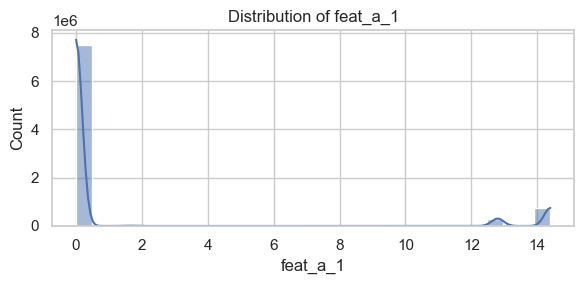

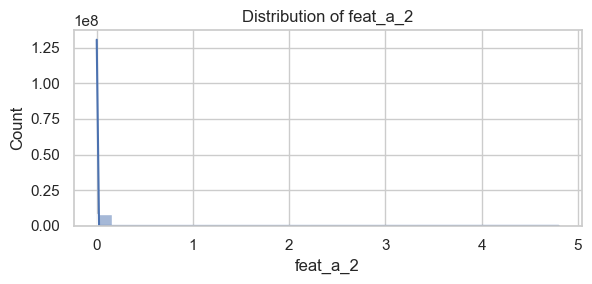

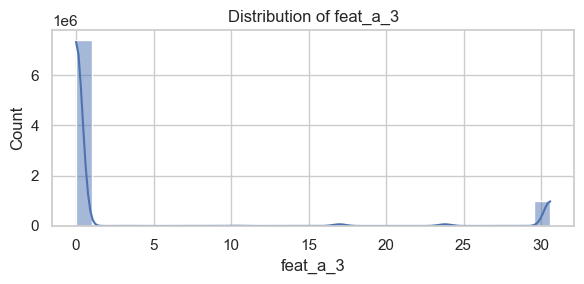

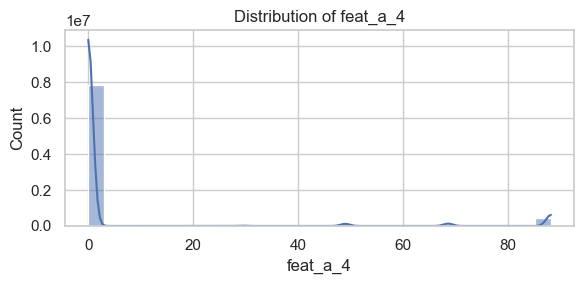

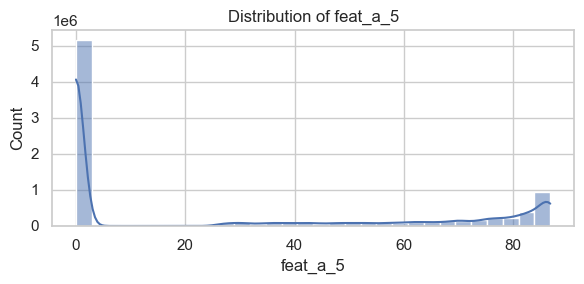

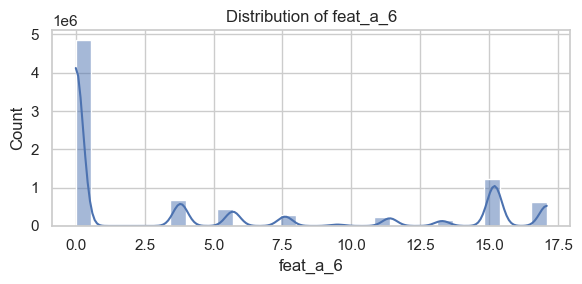

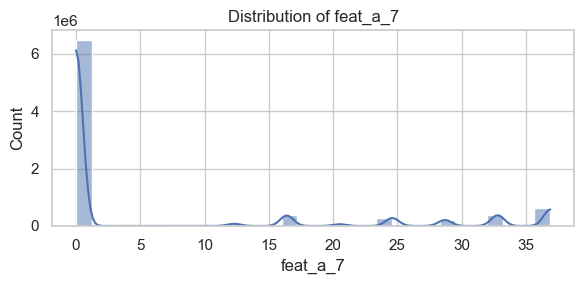

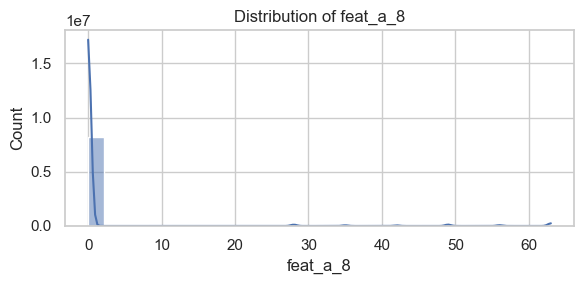

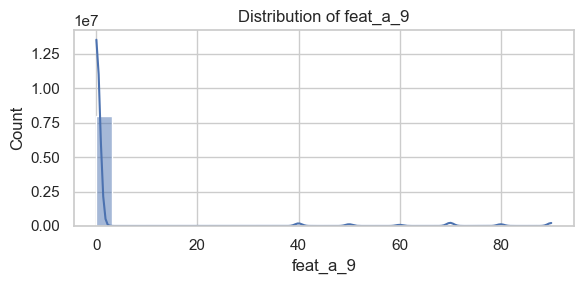

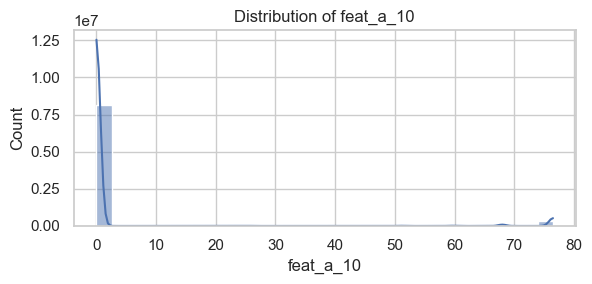

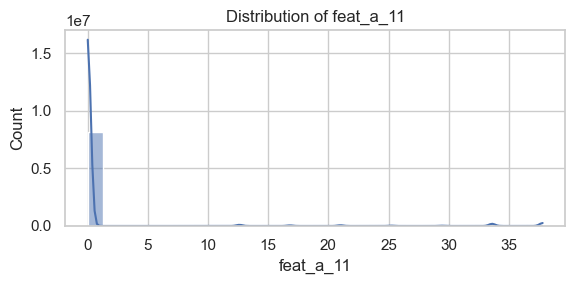

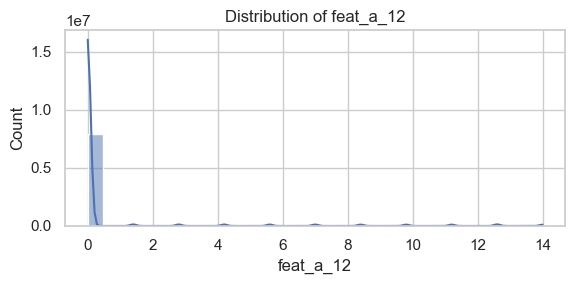

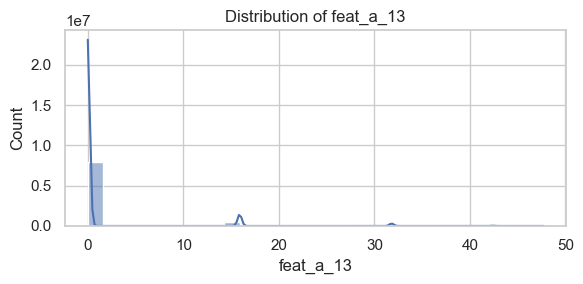

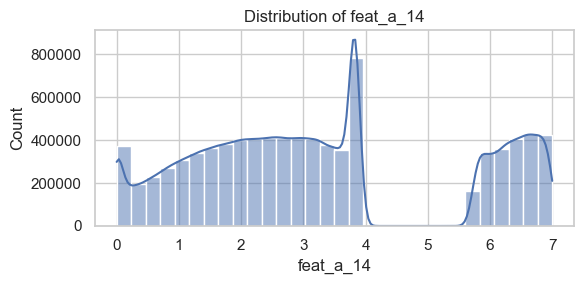

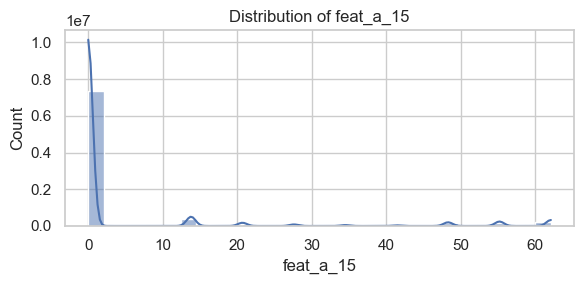

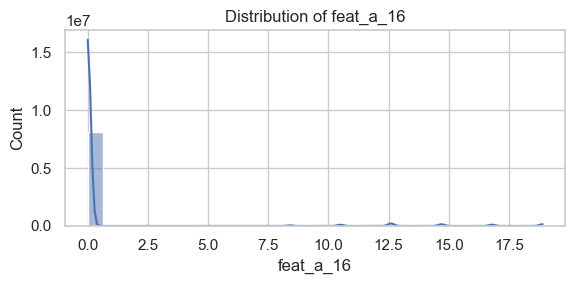

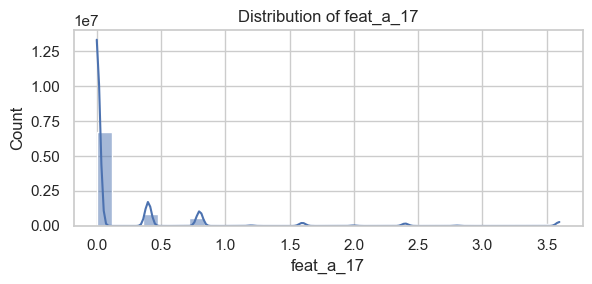

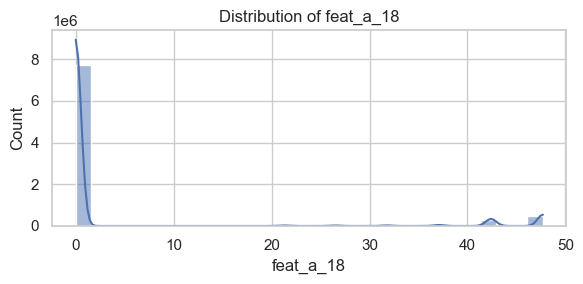

In [40]:
# %%
# Step 4: Distribution (Histogram) for each feat_a_* variable
import matplotlib.pyplot as plt
import seaborn as sns

for col in feat_a_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(data=train_df, x=col, bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()


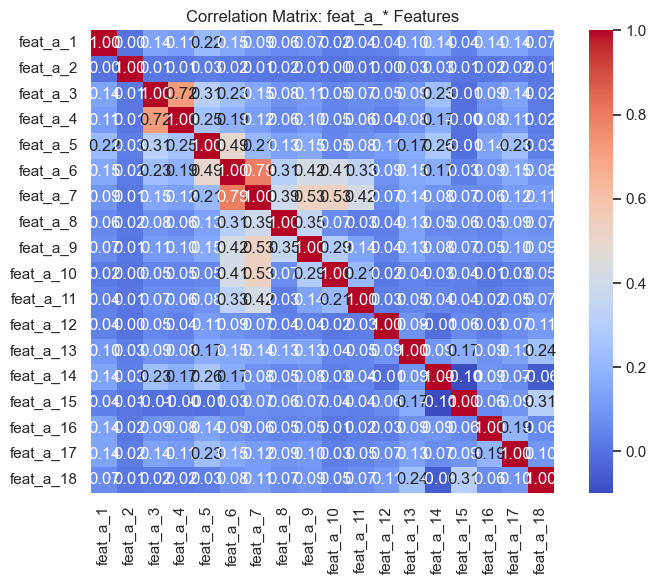

Feature pairs with correlation > 0.8:



In [41]:
# %%
# Step 5: Correlation matrix & Highly correlated feature pairs
import numpy as np

# Correlation matrix
plt.figure(figsize=(8, 6))
corr_matrix = train_df[feat_a_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix: feat_a_* Features")
plt.tight_layout()
plt.show()

# Identify highly correlated pairs
corr_abs = corr_matrix.abs()
np.fill_diagonal(corr_abs.values, 0)

threshold = 0.8
high_corr_pairs = np.where(corr_abs > threshold)
printed = set()

print(f"Feature pairs with correlation > {threshold}:\n")
for i, j in zip(*high_corr_pairs):
    pair = tuple(sorted((corr_abs.index[i], corr_abs.columns[j])))
    if pair not in printed:
        printed.add(pair)
        print(f"{pair[0]} ↔ {pair[1]}: {corr_abs.iloc[i, j]:.3f}")

In [42]:
# %%
# Step 1: Identify history_a_* columns
history_a_cols = [c for c in train.columns if c.startswith("history_a_")]
print(f"history_a_* columns: {history_a_cols}")

# %%
# Step 2: Summary table for history_a_* features (train_df 기준)
train_df[history_a_cols].describe().T

history_a_* columns: ['history_a_1', 'history_a_2', 'history_a_3', 'history_a_4', 'history_a_5', 'history_a_6', 'history_a_7']


,count,mean,std,min,25%,50%,75%,max
history_a_1,8549647.0,0.113681,0.384140,0.000000,0.028232,0.049893,0.092868,18.709814
history_a_2,8549647.0,-0.110249,0.274867,-58.611111,-0.111111,-0.055556,0.000000,0.000000
history_a_3,8549647.0,0.049476,0.111468,0.000000,0.012195,0.024390,0.060976,20.975609
history_a_4,8549647.0,-348.968536,300.909851,-7754.714355,-497.714294,-279.857147,-123.857140,0.000000
history_a_5,8549647.0,-0.014994,0.038825,-7.913043,-0.014493,0.000000,0.000000,0.000000
history_a_6,8549647.0,-172.514771,148.074905,-3826.857178,-245.285721,-139.285721,-62.000000,0.000000
history_a_7,8549647.0,-12.087947,10.406300,-235.596161,-17.230770,-9.750000,-4.288462,0.000000


In [43]:

# Step 3: NA 
na_ratio = train_df[history_a_cols].isnull().mean().sort_values(ascending=False)
print("Missing value ratio for history_a_* features:")
print(na_ratio)

Missing value ratio for history_a_* features:
history_a_1    0.001599
history_a_2    0.001599
history_a_3    0.001599
history_a_4    0.001599
history_a_5    0.001599
history_a_6    0.001599
history_a_7    0.001599
dtype: float64


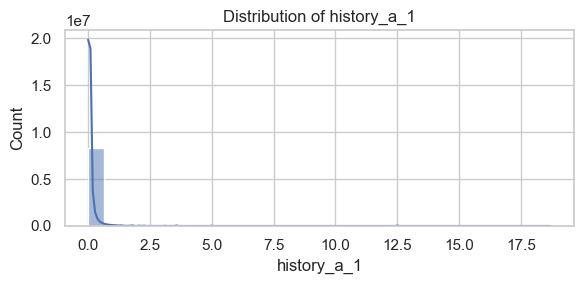

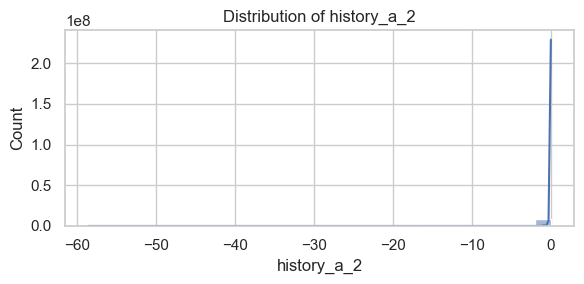

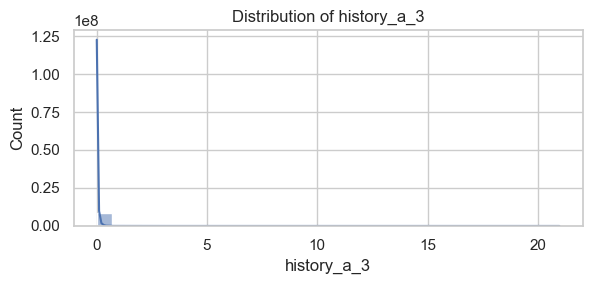

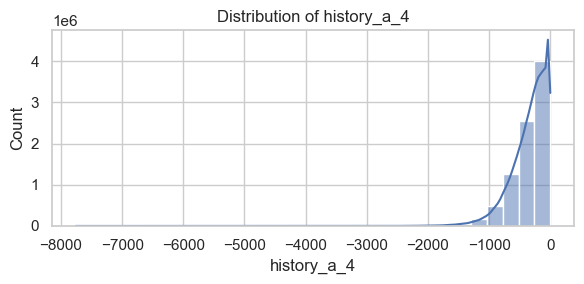

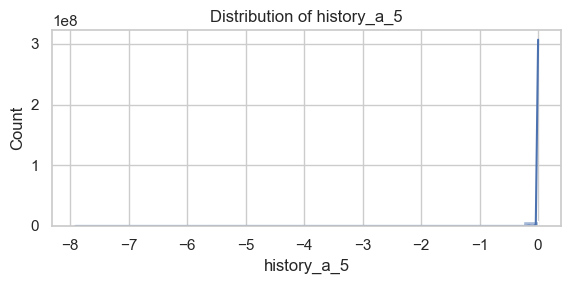

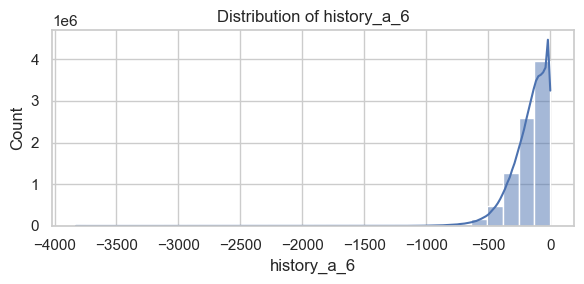

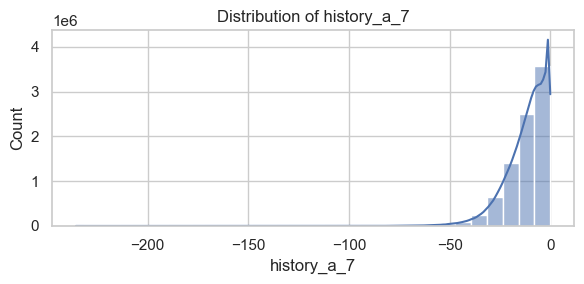

In [44]:
# %%
# Step 4 hist (distribution)
import matplotlib.pyplot as plt
import seaborn as sns

for col in history_a_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(train_df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()


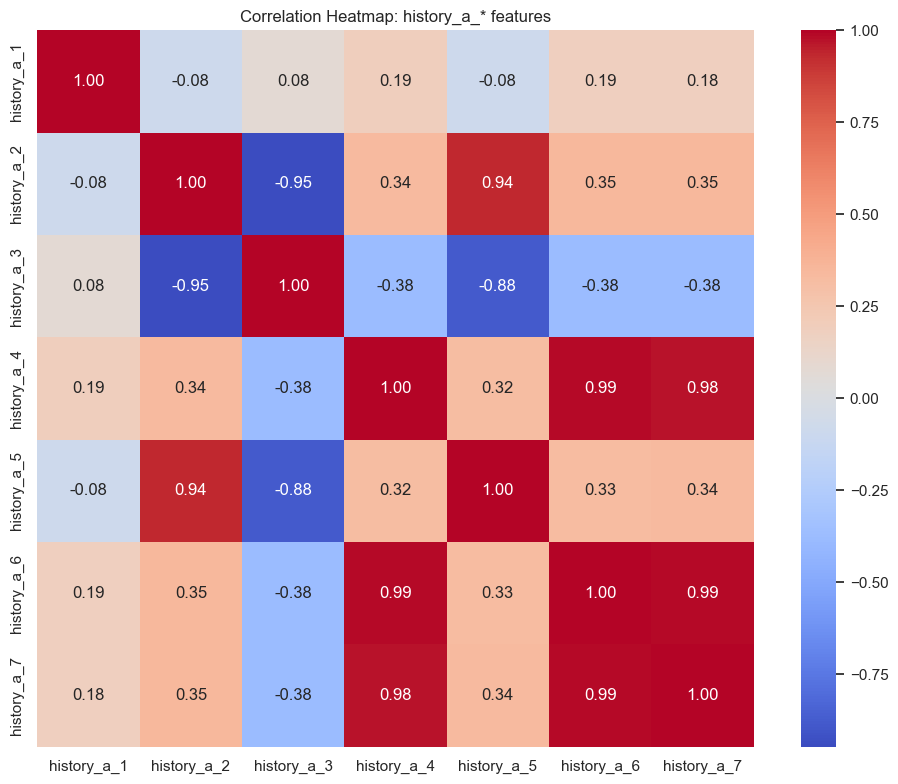

Feature pairs with correlation > 0.8:

history_a_2 ↔ history_a_3: 0.947
history_a_2 ↔ history_a_5: 0.939
history_a_3 ↔ history_a_5: 0.884
history_a_4 ↔ history_a_6: 0.989
history_a_4 ↔ history_a_7: 0.976
history_a_6 ↔ history_a_7: 0.990


In [45]:

# %%
# Step 5: X vs.X correlation heatmap
import numpy as np

corr_matrix = train_df[history_a_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap: history_a_* features")
plt.tight_layout()
plt.show()

# %%
# Step 6: corr > 0.8
corr_abs = corr_matrix.abs()
np.fill_diagonal(corr_abs.values, 0)  

threshold = 0.8
high_corr_pairs = np.where(corr_abs > threshold)
printed = set()

print(f"Feature pairs with correlation > {threshold}:\n")
for i, j in zip(*high_corr_pairs):
    pair = tuple(sorted((corr_abs.index[i], corr_abs.columns[j])))
    if pair not in printed:
        printed.add(pair)
        print(f"{pair[0]} ↔ {pair[1]}: {corr_abs.iloc[i, j]:.3f}")

Features with correlation > 0.8:



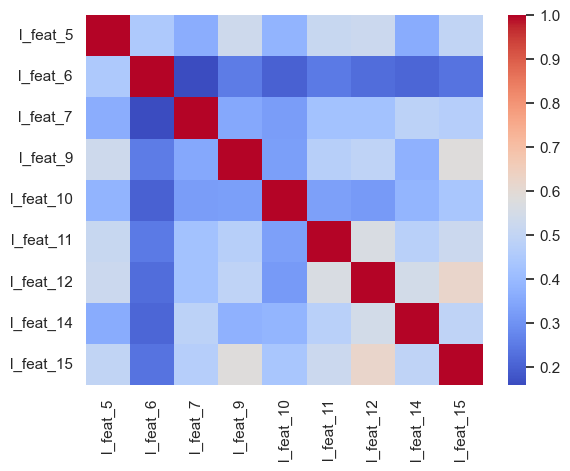

In [ ]:
# X vs. X correlationship 
sns.heatmap(train_df[int_cols].corr(), annot=False, cmap='coolwarm')

import numpy as np
corr_matrix = train_df[int_cols].corr().abs()
np.fill_diagonal(corr_matrix.values, 0) # exclude diag.

threshold = 0.8
high_corr_pairs = np.where(corr_matrix > threshold)
printed = set()

print(f"Features with correlation > {threshold}:\n")
for i, j in zip(*high_corr_pairs):
    pair = tuple(sorted((corr_matrix.index[i], corr_matrix.columns[j])))
    if pair not in printed:
        printed.add(pair)
        print(f"{pair[0]} ↔ {pair[1]}: {corr_matrix.iloc[i, j]:.3f}")

In [49]:
# %%
# Step 1: Identify history_b_* columns
history_b_cols = [c for c in train.columns if c.startswith("history_b_")]
print(f"history_b_* columns: {history_b_cols}")

# %%
# Step 2: Summary table for history_b_* features (train_df 기준)
train_df[history_b_cols].describe().T

history_b_* columns: ['history_b_1', 'history_b_2', 'history_b_3', 'history_b_4', 'history_b_5', 'history_b_6', 'history_b_7', 'history_b_8', 'history_b_9', 'history_b_10', 'history_b_11', 'history_b_12', 'history_b_13', 'history_b_14', 'history_b_15', 'history_b_16', 'history_b_17', 'history_b_18', 'history_b_19', 'history_b_20', 'history_b_21', 'history_b_22', 'history_b_23', 'history_b_24', 'history_b_25', 'history_b_26', 'history_b_27', 'history_b_28', 'history_b_29', 'history_b_30']


,count,mean,std,min,25%,50%,75%,max
history_b_1,8549647.0,0.428368,1.338313,0.0,0.081348,0.144365,0.286110,41.0
history_b_2,8549647.0,0.604022,2.074940,0.0,0.126780,0.225028,0.429950,89.0
history_b_3,8549647.0,0.309869,1.353859,0.0,0.040626,0.071931,0.156007,30.5
history_b_4,8549647.0,0.319683,1.437592,0.0,0.038876,0.068419,0.151866,32.5
history_b_5,8549647.0,0.167713,0.752700,0.0,0.020397,0.036094,0.080189,17.0
history_b_6,8549647.0,0.009779,0.044222,0.0,0.001167,0.002053,0.004587,1.0
history_b_7,8549647.0,0.156918,0.708081,0.0,0.018845,0.033162,0.073904,16.0
history_b_8,8549647.0,0.323966,1.459559,0.0,0.039217,0.068963,0.153133,33.0
history_b_9,8549647.0,0.030150,0.133066,0.0,0.003868,0.006826,0.014926,3.0
history_b_10,8549647.0,0.153357,0.609841,0.0,0.025164,0.044777,0.090604,18.0


Missing value ratio for history_b_* features:
history_b_1     0.001599
history_b_2     0.001599
history_b_29    0.001599
history_b_28    0.001599
history_b_27    0.001599
history_b_26    0.001599
history_b_25    0.001599
history_b_24    0.001599
history_b_23    0.001599
history_b_22    0.001599
history_b_21    0.001599
history_b_20    0.001599
history_b_19    0.001599
history_b_18    0.001599
history_b_17    0.001599
history_b_16    0.001599
history_b_15    0.001599
history_b_14    0.001599
history_b_13    0.001599
history_b_12    0.001599
history_b_11    0.001599
history_b_10    0.001599
history_b_9     0.001599
history_b_8     0.001599
history_b_7     0.001599
history_b_6     0.001599
history_b_5     0.001599
history_b_4     0.001599
history_b_3     0.001599
history_b_30    0.001599
dtype: float64


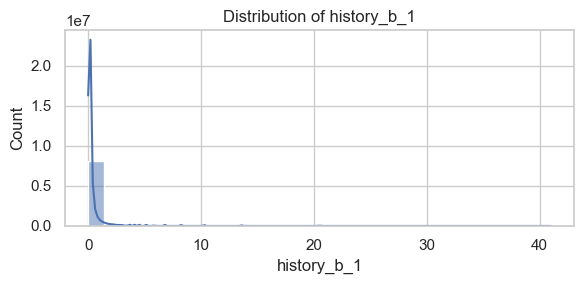

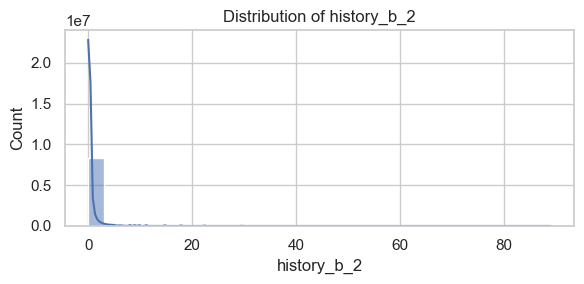

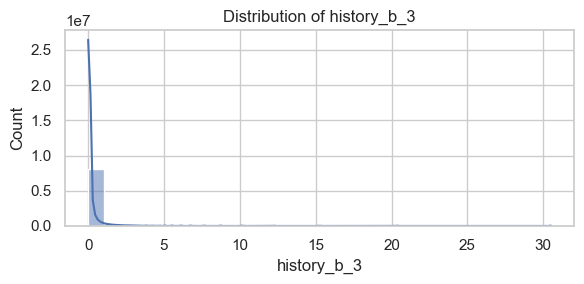

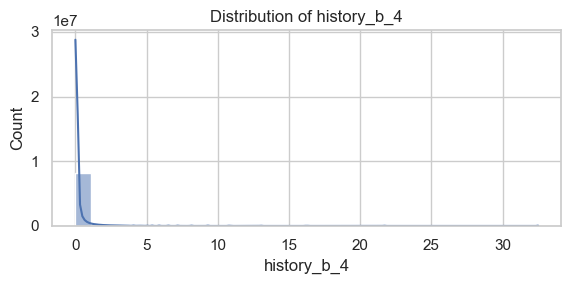

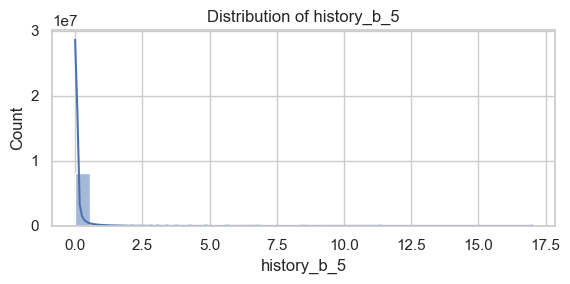

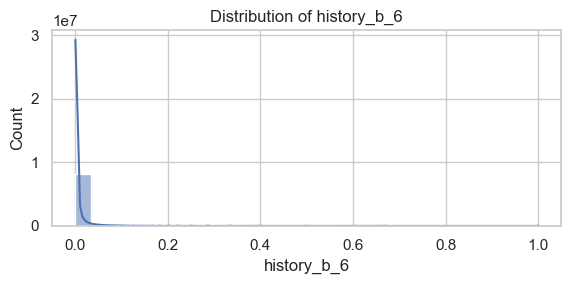

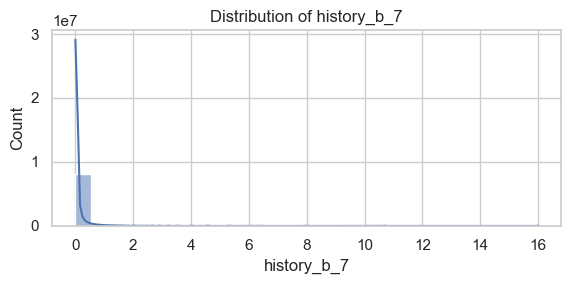

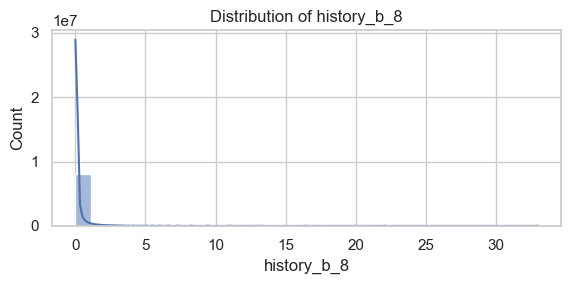

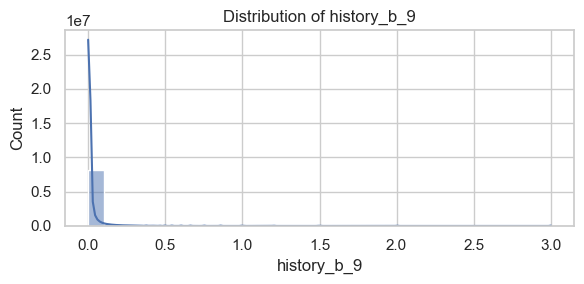

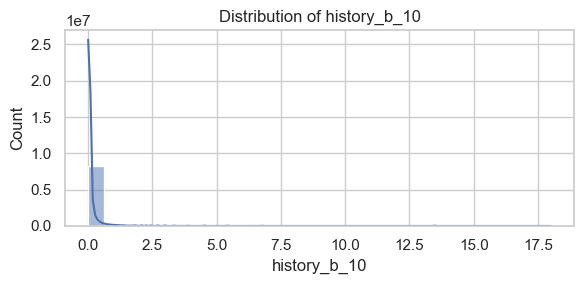

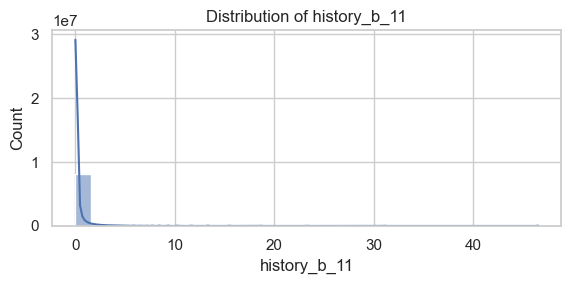

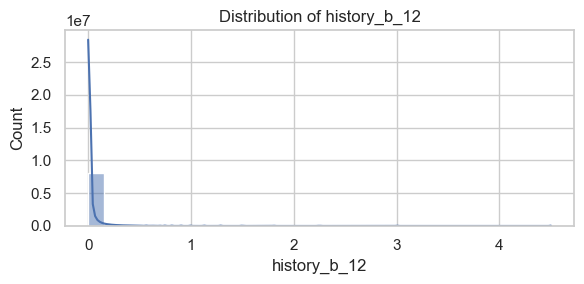

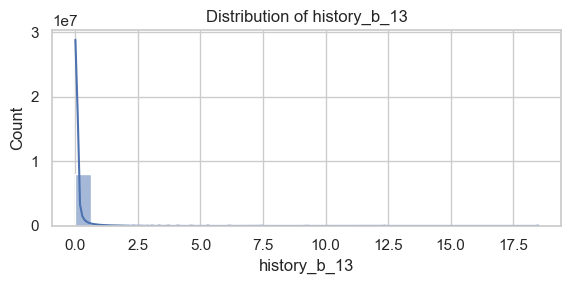

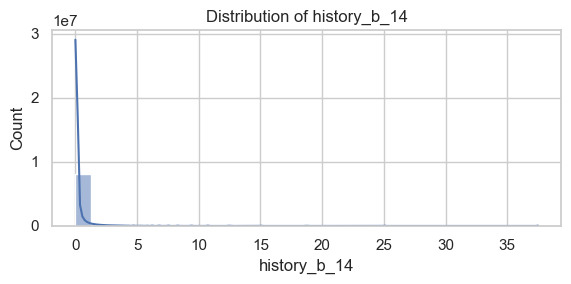

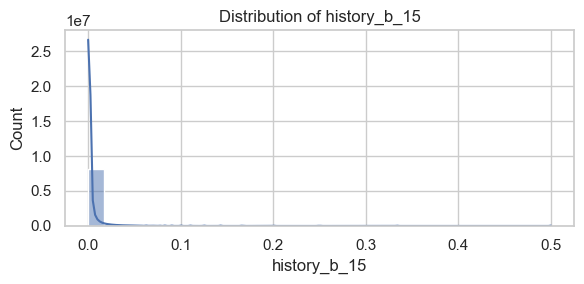

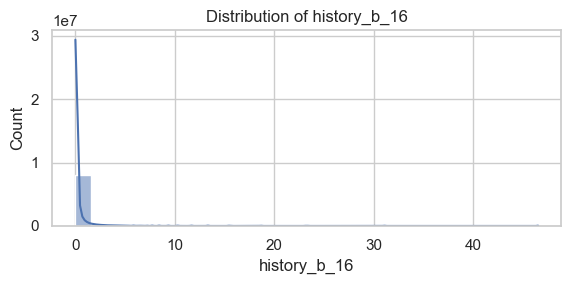

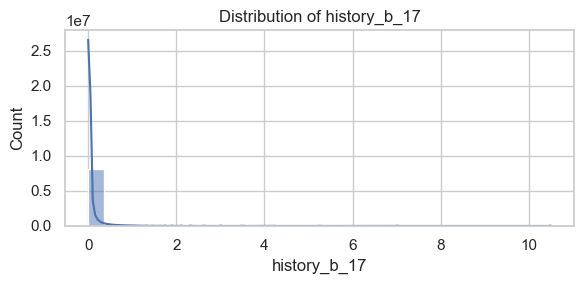

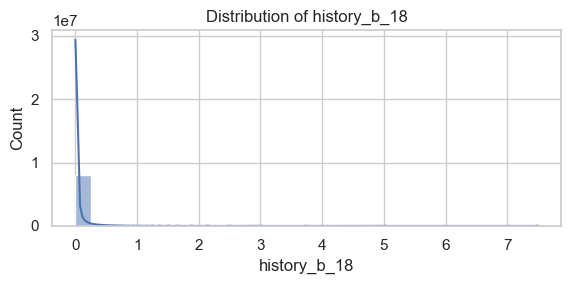

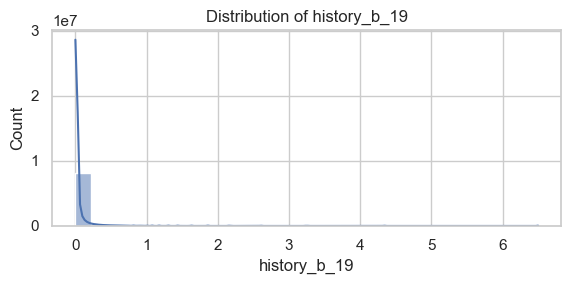

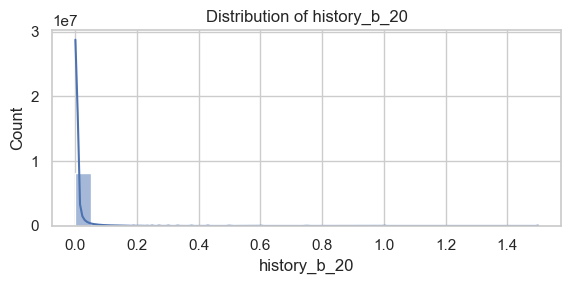

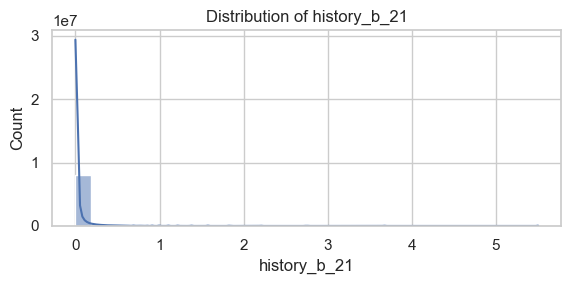

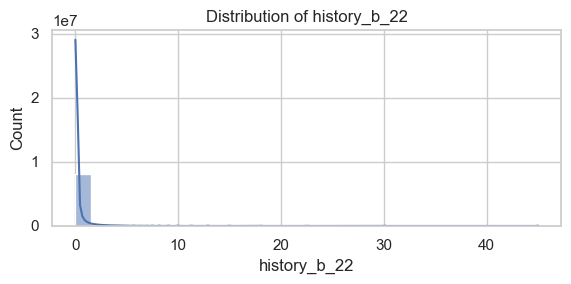

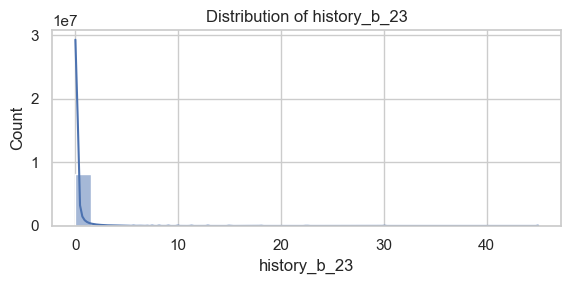

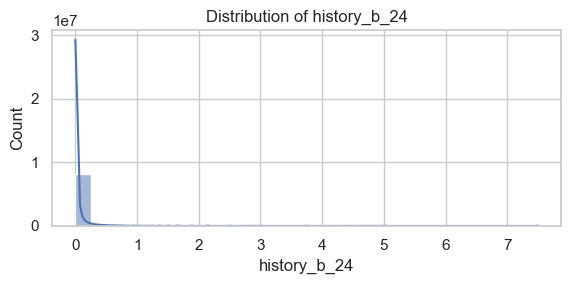

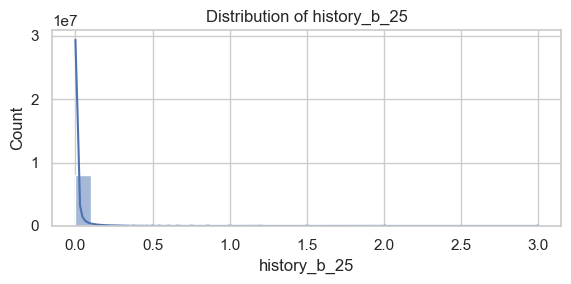

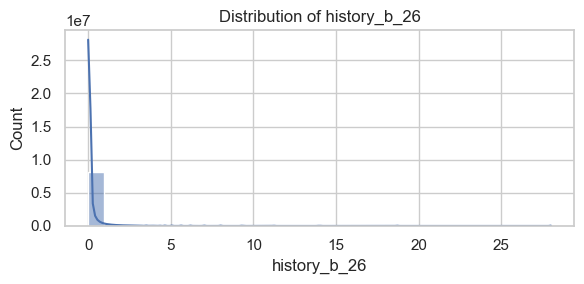

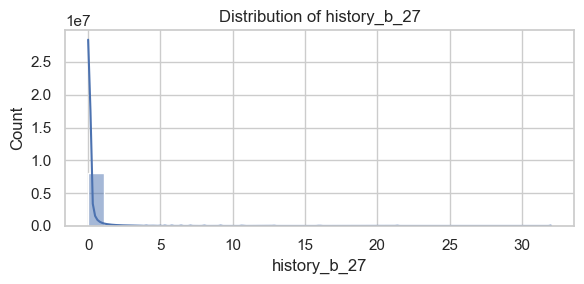

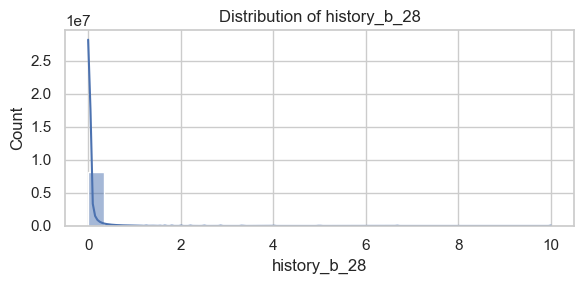

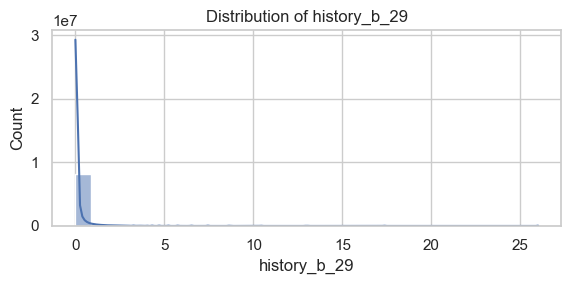

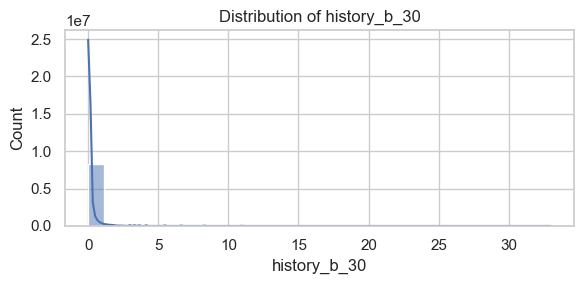

In [50]:

# %%
# Step 3: NA
na_ratio = train_df[history_b_cols].isnull().mean().sort_values(ascending=False)
print("Missing value ratio for history_b_* features:")
print(na_ratio)

# %%
# Step 4: histogram
import matplotlib.pyplot as plt
import seaborn as sns

for col in history_b_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(train_df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

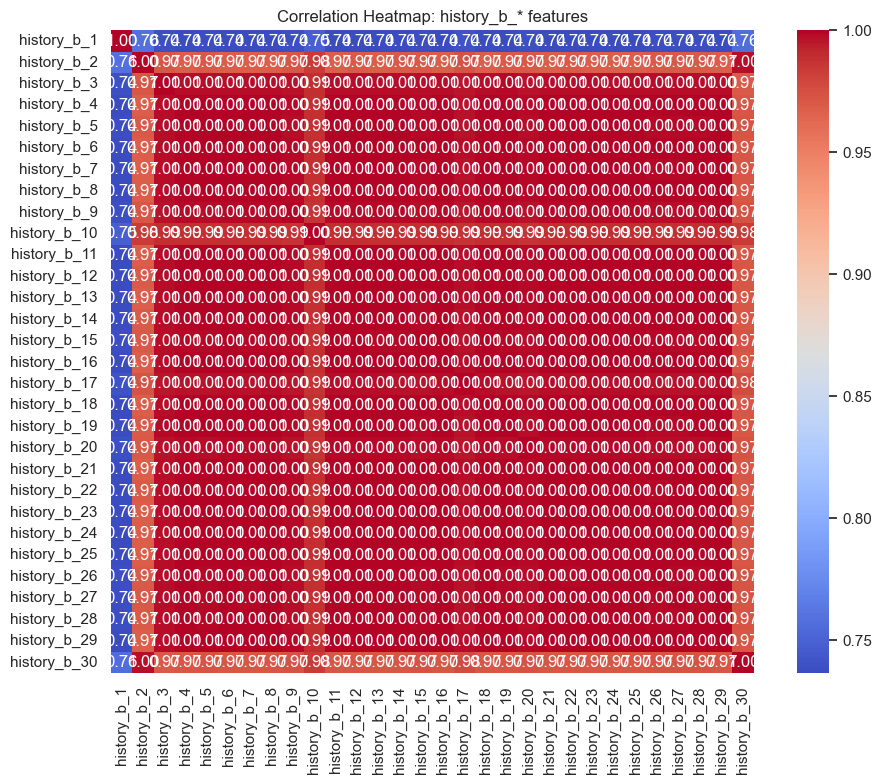

Feature pairs with correlation > 0.8:

history_b_2 ↔ history_b_3: 0.971
history_b_2 ↔ history_b_4: 0.969
history_b_2 ↔ history_b_5: 0.970
history_b_2 ↔ history_b_6: 0.969
history_b_2 ↔ history_b_7: 0.969
history_b_2 ↔ history_b_8: 0.969
history_b_2 ↔ history_b_9: 0.972
history_b_10 ↔ history_b_2: 0.984
history_b_11 ↔ history_b_2: 0.969
history_b_12 ↔ history_b_2: 0.969
history_b_13 ↔ history_b_2: 0.969
history_b_14 ↔ history_b_2: 0.969
history_b_15 ↔ history_b_2: 0.971
history_b_16 ↔ history_b_2: 0.969
history_b_17 ↔ history_b_2: 0.974
history_b_18 ↔ history_b_2: 0.969
history_b_19 ↔ history_b_2: 0.969
history_b_2 ↔ history_b_20: 0.971
history_b_2 ↔ history_b_21: 0.969
history_b_2 ↔ history_b_22: 0.969
history_b_2 ↔ history_b_23: 0.969
history_b_2 ↔ history_b_24: 0.969
history_b_2 ↔ history_b_25: 0.969
history_b_2 ↔ history_b_26: 0.970
history_b_2 ↔ history_b_27: 0.970
history_b_2 ↔ history_b_28: 0.970
history_b_2 ↔ history_b_29: 0.969
history_b_2 ↔ history_b_30: 0.998
history_b_3 ↔ hi

In [51]:
# %%
# Step 5:X vs. X correlation heatmap
import numpy as np

corr_matrix = train_df[history_b_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap: history_b_* features")
plt.tight_layout()
plt.show()

# %%
# Step 6: corr> 0.8 
corr_abs = corr_matrix.abs()
np.fill_diagonal(corr_abs.values, 0) 

threshold = 0.8
high_corr_pairs = np.where(corr_abs > threshold)
printed = set()

print(f"Feature pairs with correlation > {threshold}:\n")
for i, j in zip(*high_corr_pairs):
    pair = tuple(sorted((corr_abs.index[i], corr_abs.columns[j])))
    if pair not in printed:
        printed.add(pair)
        print(f"{pair[0]} ↔ {pair[1]}: {corr_abs.iloc[i, j]:.3f}")

In [56]:
# X vs. X (categorical) with p-value and drop plan (corr>0.99 & p-value<0.01)
from scipy.stats import pearsonr
import numpy as np
import pandas as pd

# --- User settings ---
R_THRESH = 0.995         
ALPHA = 0.01        
SAMPLE_N = None         # e.g., 1_000_000 to speed up on very large data

prefixes = ("feat_", "history_a_", "history_b_")
base_cols = [c for c in train_df.columns if c.startswith(prefixes)]

lfeat_numeric = [
    "l_feat_5","l_feat_6","l_feat_7","l_feat_9","l_feat_10",
    "l_feat_11","l_feat_12","l_feat_14","l_feat_15"
]
lfeat_numeric = [c for c in lfeat_numeric if c in train_df.columns]

target_cols = list(dict.fromkeys(base_cols + lfeat_numeric))
num_cols = [c for c in target_cols if pd.api.types.is_numeric_dtype(train_df[c])]

# Optional sampling for speed (row-wise)
df_num = train_df[num_cols]
if SAMPLE_N is not None and len(df_num) > SAMPLE_N:
    df_num = df_num.sample(SAMPLE_N, random_state=42)

# 2) coarse filter by |r| (fast)
corr_abs = df_num.corr().abs()
np.fill_diagonal(corr_abs.values, 0)
candidates = np.where(corr_abs.values >= R_THRESH)

pairs = []
seen = set()
for i, j in zip(*candidates):
    a, b = corr_abs.index[i], corr_abs.columns[j]
    key = tuple(sorted((a, b)))
    if key in seen:
        continue
    seen.add(key)
    pairs.append(key)

# 3) refine with p-value using Pearson test on candidate pairs
sig_pairs = []
for a, b in pairs:
    # align & drop NA just for these two columns
    xy = df_num[[a, b]].dropna()
    if len(xy) < 3:
        continue
    r, p = pearsonr(xy[a].values, xy[b].values)
    if abs(r) >= R_THRESH and p < ALPHA:
        sig_pairs.append((a, b, r, p))

# 4) decide drops (heuristic): drop the one with more missing, else lower variance
to_drop = set()
for a, b, r, p in sig_pairs:
    na_a = train_df[a].isna().mean()
    na_b = train_df[b].isna().mean()
    if na_a > na_b:
        drop = a
    elif na_b > na_a:
        drop = b
    else:
        var_a = train_df[a].var()
        var_b = train_df[b].var()
        drop = a if var_a < var_b else b
    to_drop.add(drop)

print("Significant near-duplicate pairs (|r| ≥ {:.2f}, p < {}):".format(R_THRESH, ALPHA))
for a, b, r, p in sorted(sig_pairs, key=lambda x: -abs(x[2])):
    print(f"{a} ↔ {b}: r={r:.3f}, p={p:.2e}")

print("\columns to drop (heuristic):")
print(sorted(to_drop))

Significant near-duplicate pairs (|r| ≥ 0.99, p < 0.01):
history_b_16 ↔ history_b_21: r=1.000, p=0.00e+00
history_b_16 ↔ history_b_18: r=1.000, p=0.00e+00
history_b_18 ↔ history_b_21: r=1.000, p=0.00e+00
history_b_16 ↔ history_b_24: r=1.000, p=0.00e+00
history_b_21 ↔ history_b_24: r=1.000, p=0.00e+00
history_b_18 ↔ history_b_24: r=1.000, p=0.00e+00
history_b_16 ↔ history_b_23: r=1.000, p=0.00e+00
history_b_21 ↔ history_b_23: r=1.000, p=0.00e+00
history_b_16 ↔ history_b_29: r=1.000, p=0.00e+00
history_b_16 ↔ history_b_6: r=1.000, p=0.00e+00
history_b_18 ↔ history_b_23: r=1.000, p=0.00e+00
history_b_21 ↔ history_b_29: r=1.000, p=0.00e+00
history_b_21 ↔ history_b_6: r=1.000, p=0.00e+00
history_b_18 ↔ history_b_6: r=1.000, p=0.00e+00
history_b_16 ↔ history_b_25: r=1.000, p=0.00e+00
history_b_18 ↔ history_b_29: r=1.000, p=0.00e+00
history_b_21 ↔ history_b_25: r=1.000, p=0.00e+00
history_b_18 ↔ history_b_25: r=1.000, p=0.00e+00
history_b_23 ↔ history_b_24: r=1.000, p=0.00e+00
history_b_24 ↔ 

In [58]:
train_df = train_df.drop(columns=list(to_drop), errors='ignore')
valid_df = valid_df.drop(columns=list(to_drop), errors='ignore')

In [57]:
# X vs. X (categorical) with p-value and drop plan (V==1 only)
import itertools
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# ----- User settings (conservative) -----
TOP_K = 30          # how many top pairs to display
MAX_CARD = 50       # skip pairs if either variable has > MAX_CARD unique categories
SAMPLE_N = None     # e.g., 2_000_000 for speed; None = full
ALPHA = 0.01        # significance level for chi-square test

# Selected numeric l_feat_* to exclude from Cramér's V
lfeat_numeric = [
    "l_feat_5","l_feat_6","l_feat_7","l_feat_9","l_feat_10",
    "l_feat_11","l_feat_12","l_feat_14","l_feat_15"
]

# 1) Collect categorical l_feat_* candidates
lfeat_all = [c for c in train_df.columns if c.startswith("l_feat_")]
lfeat_cats = [c for c in lfeat_all if c not in lfeat_numeric]

# Optional sampling for speed
df_cv = train_df[lfeat_cats].copy()
if SAMPLE_N is not None and len(df_cv) > SAMPLE_N:
    df_cv = df_cv.sample(SAMPLE_N, random_state=42)

# Ensure category dtype (saves memory/compute)
for c in lfeat_cats:
    if not pd.api.types.is_categorical_dtype(df_cv[c]):
        try:
            df_cv[c] = df_cv[c].astype("Float64").round().astype("Int64").astype("category")
        except Exception:
            df_cv[c] = df_cv[c].astype("category")

def cramers_v_bias_corrected_and_p(x: pd.Series, y: pd.Series):
    """
    Compute bias-corrected Cramér's V and chi-square p-value between two categorical Series.
    Returns (V, p_value). If invalid, returns (np.nan, np.nan).

    Reference for bias correction: Bergsma (2013).
    """
    mask = x.notna() & y.notna()
    x = x[mask]
    y = y[mask]
    if x.empty or y.empty:
        return np.nan, np.nan

    ct = pd.crosstab(x, y)
    n = ct.values.sum()
    if n == 0:
        return np.nan, np.nan

    # Chi-square and p-value (scipy)
    chi2, p, dof, _ = chi2_contingency(ct, correction=False)

    # Bias-corrected V
    r, k = ct.shape
    phi2 = chi2 / n
    if n <= 1:
        return 0.0, p
    phi2_corr = max(0.0, phi2 - (k - 1)*(r - 1)/(n - 1))
    r_corr = r - (r - 1)**2/(n - 1)
    k_corr = k - (k - 1)**2/(n - 1)
    denom = max(1e-12, min(r_corr - 1, k_corr - 1))
    V = float(np.sqrt(phi2_corr / denom))
    return V, p

# 2) Compute V and p for all pairs (respecting cardinality cap)
rows = []
for a, b in itertools.combinations(lfeat_cats, 2):
    ua, ub = df_cv[a].nunique(dropna=True), df_cv[b].nunique(dropna=True)
    if ua > MAX_CARD or ub > MAX_CARD:
        continue
    V, p = cramers_v_bias_corrected_and_p(df_cv[a], df_cv[b])
    if not np.isnan(V):
        rows.append((a, b, V, p, ua, ub))

# 3) Sort for display
rows_sorted = sorted(rows, key=lambda x: (-x[2], x[3]))  # by V desc, then p asc

print(f"Top {min(TOP_K, len(rows_sorted))} Cramér's V pairs among l_feat_* (excluding numeric l_feats):\n")
for a, b, V, p, ua, ub in rows_sorted[:TOP_K]:
    print(f"{a} ↔ {b}: V={V:.3f}, p={p:.2e}  (card: {ua}×{ub})")

df_cramers = pd.DataFrame(rows_sorted, columns=["feature_1","feature_2","cramers_v","p_value","card_1","card_2"])

# 4) Build drop list only for perfect association (V ≈ 1) AND significant
EPS = 1e-6  # tolerance for floating rounding
perfect_sig = df_cramers[(df_cramers["cramers_v"] >= 1.0 - EPS) & (df_cramers["p_value"] < ALPHA)]

to_drop = set()
kept = set()

def pick_to_drop(a, b):
    """Keep the one with lower missing rate and lower cardinality; tie-break by name."""
    na_a = train_df[a].isna().mean()
    na_b = train_df[b].isna().mean()
    ua = train_df[a].nunique(dropna=True)
    ub = train_df[b].nunique(dropna=True)

    # Prefer lower missing rate
    if na_a != na_b:
        keep, drop = (a, b) if na_a < na_b else (b, a)
    # Then prefer lower cardinality
    elif ua != ub:
        keep, drop = (a, b) if ua < ub else (b, a)
    # Tie-break by alphabetical order (keep earlier)
    else:
        keep, drop = (min(a, b), max(a, b))
    return keep, drop

for _, row in perfect_sig.iterrows():
    a, b = row["feature_1"], row["feature_2"]
    # Skip if either already decided
    if a in to_drop or b in to_drop:
        continue
    keep, drop = pick_to_drop(a, b)
    kept.add(keep)
    to_drop.add(drop)

print("\nPerfect-association (V≈1) & significant pairs found:", len(perfect_sig))
print("Will drop these columns (to avoid exact duplicates/aliases):")
print(sorted(to_drop))

/var/folders/hg/v9v4slf113jb0w4kpzx5y_zw0000gn/T/ipykernel_25143/3651936359.py:30: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df_cv[c]):


Top 30 Cramér's V pairs among l_feat_* (excluding numeric l_feats):

l_feat_1 ↔ l_feat_16: V=1.000, p=0.00e+00  (card: 2×2)
l_feat_1 ↔ l_feat_3: V=1.000, p=0.00e+00  (card: 2×3)
l_feat_3 ↔ l_feat_16: V=1.000, p=0.00e+00  (card: 3×2)
l_feat_4 ↔ l_feat_13: V=0.391, p=0.00e+00  (card: 26×2)
l_feat_1 ↔ l_feat_4: V=0.340, p=0.00e+00  (card: 2×26)
l_feat_4 ↔ l_feat_16: V=0.340, p=0.00e+00  (card: 26×2)
l_feat_3 ↔ l_feat_4: V=0.336, p=0.00e+00  (card: 3×26)
l_feat_2 ↔ l_feat_22: V=0.281, p=0.00e+00  (card: 2×2)
l_feat_21 ↔ l_feat_26: V=0.269, p=0.00e+00  (card: 2×18)
l_feat_21 ↔ l_feat_27: V=0.166, p=0.00e+00  (card: 2×5)
l_feat_3 ↔ l_feat_13: V=0.159, p=0.00e+00  (card: 3×2)
l_feat_4 ↔ l_feat_27: V=0.130, p=0.00e+00  (card: 26×5)
l_feat_2 ↔ l_feat_4: V=0.120, p=0.00e+00  (card: 2×26)
l_feat_26 ↔ l_feat_27: V=0.115, p=0.00e+00  (card: 18×5)
l_feat_19 ↔ l_feat_26: V=0.110, p=0.00e+00  (card: 2×18)
l_feat_4 ↔ l_feat_21: V=0.108, p=0.00e+00  (card: 26×2)
l_feat_13 ↔ l_feat_27: V=0.103, p=0.00e+0

In [59]:
train_df = train_df.drop(columns=list(to_drop), errors='ignore')
valid_df = valid_df.drop(columns=list(to_drop), errors='ignore')

In [60]:
# Check Data Leakage 

def check_category_leakage(train_df, valid_df, cat_cols):
    for col in cat_cols:
        train_unique = set(train_df[col].dropna().unique())
        valid_unique = set(valid_df[col].dropna().unique())

        only_in_train = train_unique - valid_unique
        only_in_valid = valid_unique - train_unique

        if only_in_train or only_in_valid:
            print(f"[{col}]")
            if only_in_train:
                print(f"  Categories only in train: {only_in_train}")
            if only_in_valid:
                print(f"  Categories only in valid: {only_in_valid}")

In [66]:
from scipy.stats import ks_2samp

shifted_cols = []

for col in num_cols:  
    stat, pval = ks_2samp(train_df[col].dropna(), valid_df[col].dropna())
    if pval < 0.01:  
        shifted_cols.append((col, pval))


shifted_cols = sorted(shifted_cols, key=lambda x: x[1])
for col, pval in shifted_cols:
    print(f"{col}: p-value={pval:.2e}")